In [1]:
def practical_interpretation():
    """
    Практическая интерпретация R² на примере биткойна
    """
    print("=== ПРАКТИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ ===")
    print("R² = 0.75 означает:")

    print("\n1. Объяснение дисперсии:")
    print("   • 75% изменений цены биткойна можно предсказать по признакам")
    print("   • 25% изменений остаются случайными/неизвестными")

    print("\n2. Качество предсказаний:")
    print("   • Модель улавливает основные закономерности")
    print("   • Но четверть вариабельности остается непредсказуемой")

    print("\n3. Практические следствия:")
    print("   • Модель полезна для понимания рынка")
    print("   • Но не стоит полагаться на нее на 100%")
    print("   • Всегда остается элемент неопределенности")

    print("\n4. Сравнение с базовой ситуацией:")
    print(f"   • Без модели: ошибка = {np.sqrt(ss_tot/30):.0f} долларов")
    print(f"   • С моделью: ошибка = {np.sqrt(ss_res/30):.0f} долларов")
    print(f"   • Улучшение в {np.sqrt(ss_tot/ss_res):.1f} раза!")

practical_interpretation()

=== ПРАКТИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ ===
R² = 0.75 означает:

1. Объяснение дисперсии:
   • 75% изменений цены биткойна можно предсказать по признакам
   • 25% изменений остаются случайными/неизвестными

2. Качество предсказаний:
   • Модель улавливает основные закономерности
   • Но четверть вариабельности остается непредсказуемой

3. Практические следствия:
   • Модель полезна для понимания рынка
   • Но не стоит полагаться на нее на 100%
   • Всегда остается элемент неопределенности

4. Сравнение с базовой ситуацией:


NameError: name 'np' is not defined

In [2]:
def r2_explanation_formula():
    """
    Объяснение формулы R² через призму объяснения дисперсии
    """
    print("=== ФОРМУЛА R² ===")
    print("R² = 1 - (SS_res / SS_tot)")
    print("R² = (SS_tot - SS_res) / SS_tot")
    print("R² = SS_exp / SS_tot")

    print("\nЧто означает каждая часть:")
    print("• SS_tot: сколько всего 'хаоса' в данных")
    print("• SS_res: сколько 'хаоса' модель НЕ смогла объяснить")
    print("• SS_exp: сколько 'хаоса' модель смогла объяснить")

    print(f"\nДля нашего примера:")
    print(f"• SS_tot = {ss_tot:.0f} (весь разброс цен)")
    print(f"• SS_res = {ss_res:.0f} (необъясненный разброс)")
    print(f"• SS_exp = {ss_exp:.0f} (объясненный разброс)")
    print(f"• R² = {ss_exp:.0f}/{ss_tot:.0f} = {r2:.3f}")

    print(f"\nВывод: модель объяснила {r2*100:.1f}% разброса цен биткойна")

r2_explanation_formula()

=== ФОРМУЛА R² ===
R² = 1 - (SS_res / SS_tot)
R² = (SS_tot - SS_res) / SS_tot
R² = SS_exp / SS_tot

Что означает каждая часть:
• SS_tot: сколько всего 'хаоса' в данных
• SS_res: сколько 'хаоса' модель НЕ смогла объяснить
• SS_exp: сколько 'хаоса' модель смогла объяснить

Для нашего примера:


NameError: name 'ss_tot' is not defined

Загрузка данных BTC-USD с 2020-01-01 по 2024-12-31...

=== АНАЛИЗ ТРЕНДА ===


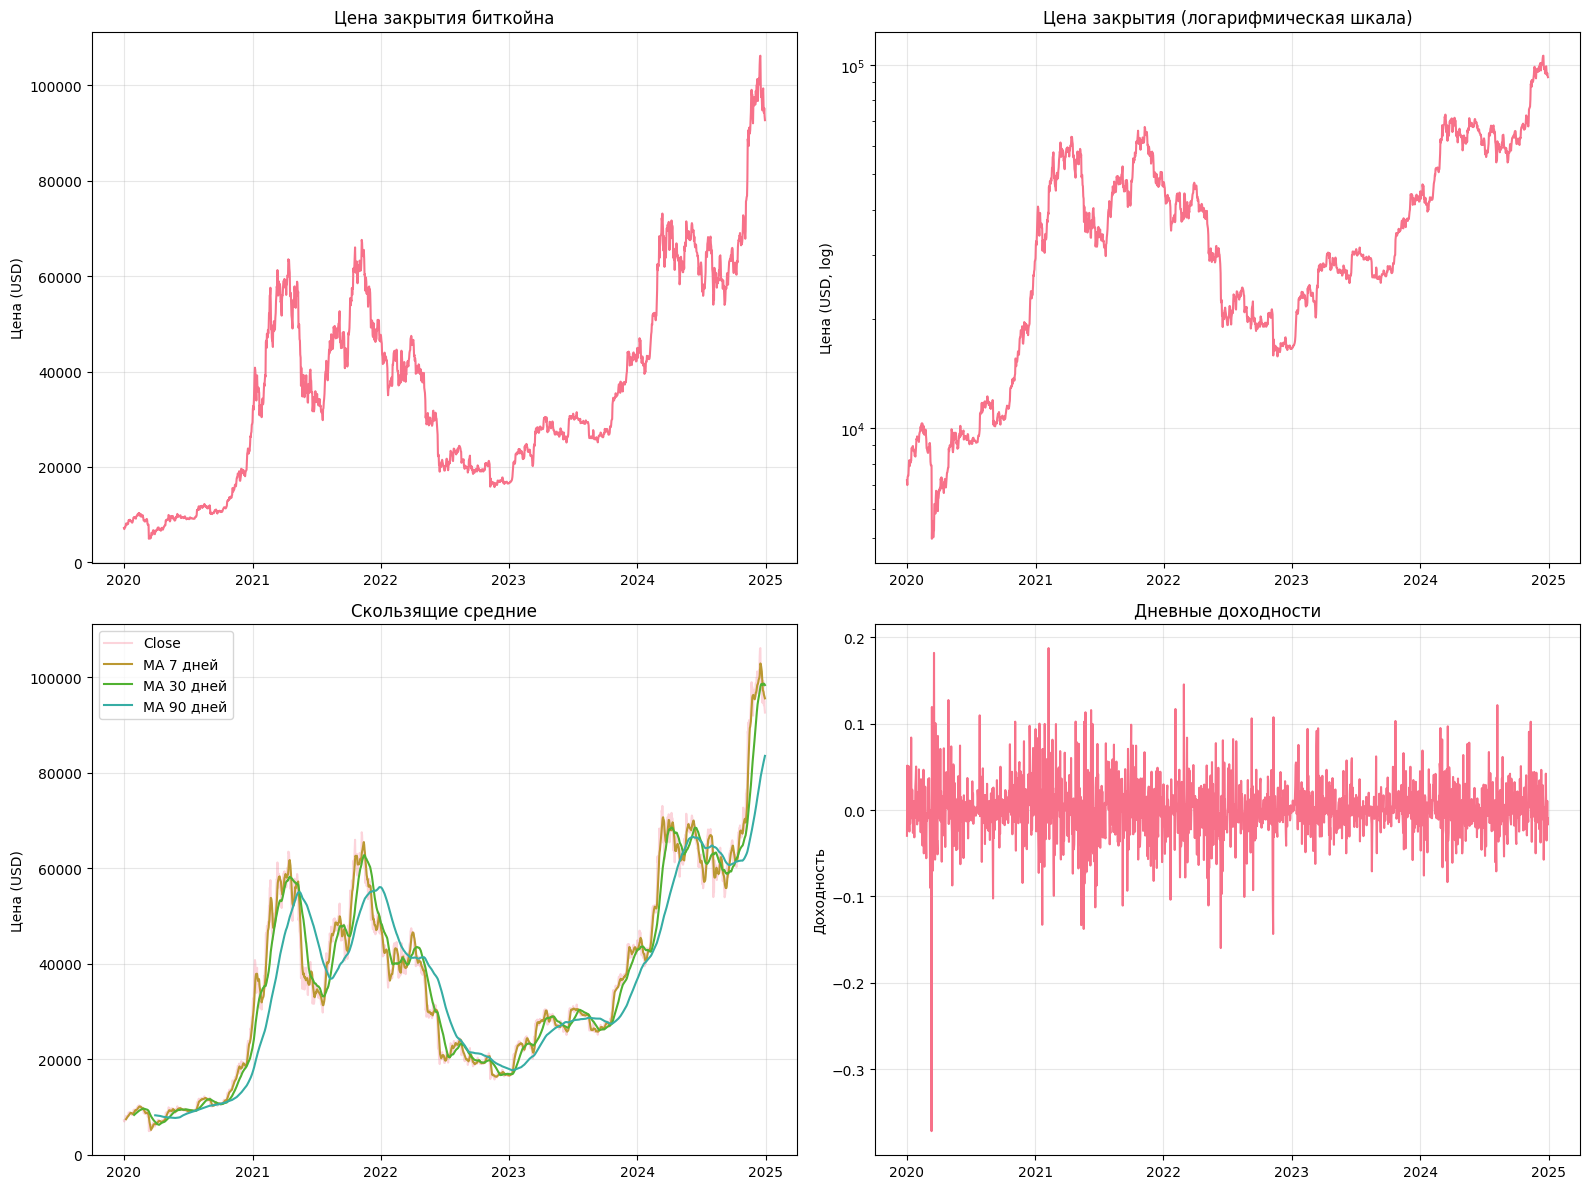

Тест Манна-Кендалла на тренд:
  Z-статистика: 28.9387
  p-value: 0.000000
  Результат: Обнаружен статистически значимый восходящий тренд
❌ Ошибка при выполнении анализа: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1826 and the array at index 1 has size 1


Traceback (most recent call last):
  File "<ipython-input-4-12fe60b34139>", line 519, in main
    trend_results = analyze_trend(df)
                    ^^^^^^^^^^^^^^^^^
  File "<ipython-input-4-12fe60b34139>", line 149, in analyze_trend
    slope, intercept, r_value, p_value, std_err = stats.linregress(time_index, close_prices.values)
                                                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py", line 10715, in linregress
    ssxm, ssxym, _, ssym = np.cov(x, y, bias=1).flat
                           ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py", line 2708, in cov
    X = np.concatenate((X, y), axis=0)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1826 and the array at index 1 h

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import acf, pacf
import warnings
import yfinance as yf
warnings.filterwarnings('ignore')

# Настройка графиков
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

def load_crypto_data(ticker='BTC-USD', start='2020-01-01', end='2024-12-31'):
    print(f"Загрузка данных {ticker} с {start} по {end}...")
    df = yf.download(ticker, start=start, end=end, progress=False)
    # Удаляем NaN значения
    df = df.dropna()

    return df

def test_stationarity(ts, title="Временной ряд"):
    """
    Тестирование стационарности временного ряда
    """
    print(f"\n=== ТЕСТ СТАЦИОНАРНОСТИ: {title} ===")

    # Augmented Dickey-Fuller тест
    adf_result = adfuller(ts.dropna())
    print(f"ADF тест:")
    print(f"  ADF статистика: {adf_result[0]:.6f}")
    print(f"  p-value: {adf_result[1]:.6f}")
    print(f"  Критические значения:")
    for key, value in adf_result[4].items():
        print(f"    {key}: {value:.3f}")

    if adf_result[1] <= 0.05:
        print(f"  Результат: Ряд стационарен (p < 0.05)")
    else:
        print(f"  Результат: Ряд НЕ стационарен (p >= 0.05)")

    # KPSS тест
    try:
        kpss_result = kpss(ts.dropna(), regression='ct')
        print(f"\nKPSS тест:")
        print(f"  KPSS статистика: {kpss_result[0]:.6f}")
        print(f"  p-value: {kpss_result[1]:.6f}")
        print(f"  Критические значения:")
        for key, value in kpss_result[3].items():
            print(f"    {key}: {value:.3f}")

        if kpss_result[1] > 0.05:
            print(f"  Результат: Ряд стационарен (p > 0.05)")
        else:
            print(f"  Результат: Ряд НЕ стационарен (p <= 0.05)")
    except:
        print(f"  KPSS тест не удался")

    return adf_result[1] <= 0.05

def analyze_trend(df):
    """
    Анализ тренда в данных
    """
    print(f"\n=== АНАЛИЗ ТРЕНДА ===")

    close_prices = df['Close'].copy()

    # 1. Визуальный анализ тренда
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Исходный ряд
    axes[0, 0].plot(close_prices.index, close_prices.values)
    axes[0, 0].set_title('Цена закрытия биткойна')
    axes[0, 0].set_ylabel('Цена (USD)')
    axes[0, 0].grid(True, alpha=0.3)

    # Логарифмическая шкала
    axes[0, 1].semilogy(close_prices.index, close_prices.values)
    axes[0, 1].set_title('Цена закрытия (логарифмическая шкала)')
    axes[0, 1].set_ylabel('Цена (USD, log)')
    axes[0, 1].grid(True, alpha=0.3)

    # Скользящие средние
    ma_7 = close_prices.rolling(window=7).mean()
    ma_30 = close_prices.rolling(window=30).mean()
    ma_90 = close_prices.rolling(window=90).mean()

    axes[1, 0].plot(close_prices.index, close_prices.values, alpha=0.3, label='Close')
    axes[1, 0].plot(ma_7.index, ma_7.values, label='MA 7 дней')
    axes[1, 0].plot(ma_30.index, ma_30.values, label='MA 30 дней')
    axes[1, 0].plot(ma_90.index, ma_90.values, label='MA 90 дней')
    axes[1, 0].set_title('Скользящие средние')
    axes[1, 0].set_ylabel('Цена (USD)')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Доходности
    returns = close_prices.pct_change().dropna()
    axes[1, 1].plot(returns.index, returns.values)
    axes[1, 1].set_title('Дневные доходности')
    axes[1, 1].set_ylabel('Доходность')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 2. Статистические тесты тренда

    # Тест Манна-Кендалла на тренд
    def mann_kendall_test(data):
        n = len(data)
        s = 0
        for i in range(n-1):
            for j in range(i+1, n):
                s += np.sign(data[j] - data[i])

        var_s = n * (n - 1) * (2 * n + 5) / 18

        if s > 0:
            z = (s - 1) / np.sqrt(var_s)
        elif s < 0:
            z = (s + 1) / np.sqrt(var_s)
        else:
            z = 0

        p_value = 2 * (1 - stats.norm.cdf(abs(z)))
        return float(z), float(p_value), bool(s > 0)

    mk_z, mk_p, has_upward_trend = mann_kendall_test(close_prices.values)

    print(f"Тест Манна-Кендалла на тренд:")
    print(f"  Z-статистика: {mk_z:.4f}")
    print(f"  p-value: {mk_p:.6f}")
    if mk_p < 0.05:
        trend_direction = "восходящий" if has_upward_trend else "нисходящий"
        print(f"  Результат: Обнаружен статистически значимый {trend_direction} тренд")
    else:
        print(f"  Результат: Тренд статистически не значим")

    # 3. Линейная регрессия тренда
    time_index = np.arange(len(close_prices))
    slope, intercept, r_value, p_value, std_err = stats.linregress(time_index, close_prices.values)

    print(f"\nЛинейная регрессия тренда:")
    print(f"  Наклон: {slope:.2f} USD/день")
    print(f"  R²: {r_value**2:.4f}")
    print(f"  p-value: {p_value:.6f}")
    print(f"  Стандартная ошибка: {std_err:.2f}")

    if p_value < 0.05:
        trend_dir = "положительный" if slope > 0 else "отрицательный"
        print(f"  Результат: {trend_dir} линейный тренд статистически значим")
    else:
        print(f"  Результат: Линейный тренд статистически не значим")

    # 4. Тестирование стационарности
    is_stationary = test_stationarity(close_prices, "Цена закрытия")

    # Если нестационарен, тестируем первые разности
    if not is_stationary:
        diff_prices = close_prices.diff().dropna()
        is_diff_stationary = test_stationarity(diff_prices, "Первые разности")

        if is_diff_stationary:
            print(f"\nВывод: Ряд интегрирован порядка 1 I(1)")
        else:
            print(f"\nВывод: Ряд может быть интегрирован порядка больше 1")

    return {
        'mann_kendall': (mk_z, mk_p, has_upward_trend),
        'linear_trend': (slope, intercept, r_value, p_value),
        'is_stationary': is_stationary,
        'returns': returns
    }

def analyze_seasonality(df):
    """
    Анализ сезонности в данных
    """
    print(f"\n=== АНАЛИЗ СЕЗОННОСТИ ===")

    close_prices = df['Close'].copy()

    # 1. Декомпозиция временного ряда
    print("Выполняется декомпозиция временного ряда...")

    # Попробуем разные периоды для декомпозиции
    periods_to_test = [7, 30, 365]  # недельная, месячная, годовая сезонность

    fig, axes = plt.subplots(len(periods_to_test), 4, figsize=(20, 5*len(periods_to_test)))
    if len(periods_to_test) == 1:
        axes = axes.reshape(1, -1)

    decomposition_results = {}

    for i, period in enumerate(periods_to_test):
        if len(close_prices) >= 2 * period:
            try:
                # Декомпозиция
                decomposition = seasonal_decompose(close_prices, model='multiplicative', period=period)
                decomposition_results[period] = decomposition

                # Графики
                axes[i, 0].plot(decomposition.observed)
                axes[i, 0].set_title(f'Исходный ряд (период={period})')
                axes[i, 0].grid(True, alpha=0.3)

                axes[i, 1].plot(decomposition.trend)
                axes[i, 1].set_title(f'Тренд (период={period})')
                axes[i, 1].grid(True, alpha=0.3)

                axes[i, 2].plot(decomposition.seasonal)
                axes[i, 2].set_title(f'Сезонность (период={period})')
                axes[i, 2].grid(True, alpha=0.3)

                axes[i, 3].plot(decomposition.resid)
                axes[i, 3].set_title(f'Остатки (период={period})')
                axes[i, 3].grid(True, alpha=0.3)

                # Статистика сезонной компоненты
                seasonal_var = np.var(decomposition.seasonal.dropna())
                total_var = np.var(decomposition.observed.dropna())
                seasonal_strength = seasonal_var / total_var

                print(f"\nПериод {period} дней:")
                print(f"  Сила сезонности: {seasonal_strength:.4f}")
                print(f"  Дисперсия сезонной компоненты: {seasonal_var:.2f}")

            except Exception as e:
                print(f"Ошибка декомпозиции для периода {period}: {e}")
        else:
            print(f"Недостаточно данных для периода {period}")

    plt.tight_layout()
    plt.show()

    # 2. Анализ по дням недели
    print(f"\n--- Анализ сезонности по дням недели ---")

    df_with_weekday = df.copy()
    df_with_weekday['weekday'] = df_with_weekday.index.dayofweek
    df_with_weekday['weekday_name'] = df_with_weekday.index.strftime('%A')

    # Группировка по дням недели
    weekday_stats = df_with_weekday.groupby('weekday_name')['Close'].agg(['mean', 'std', 'count'])
    weekday_returns = df_with_weekday.groupby('weekday_name')['Close'].pct_change().groupby(df_with_weekday['weekday_name']).agg(['mean', 'std'])

    print("Статистика по дням недели:")
    print(weekday_stats)

    # ANOVA тест для дней недели
    weekday_groups = [group['Close'].values for name, group in df_with_weekday.groupby('weekday_name')]
    f_stat, p_value_anova = stats.f_oneway(*weekday_groups)

    print(f"\nANOVA тест для дней недели:")
    print(f"  F-статистика: {f_stat:.4f}")
    print(f"  p-value: {p_value_anova:.6f}")

    if p_value_anova < 0.05:
        print(f"  Результат: Есть статистически значимые различия между днями недели")
    else:
        print(f"  Результат: Нет статистически значимых различий между днями недели")

    # График по дням недели
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_stats_ordered = weekday_stats.reindex(weekday_order, fill_value=0)

    axes[0].bar(weekday_stats_ordered.index, weekday_stats_ordered['mean'])
    axes[0].set_title('Средняя цена по дням недели')
    axes[0].set_ylabel('Цена (USD)')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3)

    # Бокс-плот по дням недели
    df_with_weekday.boxplot(column='Close', by='weekday_name', ax=axes[1])
    axes[1].set_title('Распределение цен по дням недели')
    axes[1].set_ylabel('Цена (USD)')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # 3. Анализ по месяцам
    print(f"\n--- Анализ сезонности по месяцам ---")

    df_with_month = df.copy()
    df_with_month['month'] = df_with_month.index.month
    df_with_month['month_name'] = df_with_month.index.strftime('%B')

    monthly_stats = df_with_month.groupby('month_name')['Close'].agg(['mean', 'std', 'count'])

    # ANOVA тест для месяцев
    monthly_groups = [group['Close'].values for name, group in df_with_month.groupby('month_name')]
    f_stat_month, p_value_month = stats.f_oneway(*monthly_groups)

    print(f"ANOVA тест для месяцев:")
    print(f"  F-статистика: {f_stat_month:.4f}")
    print(f"  p-value: {p_value_month:.6f}")

    if p_value_month < 0.05:
        print(f"  Результат: Есть статистически значимые различия между месяцами")
    else:
        print(f"  Результат: Нет статистически значимых различий между месяцами")

    # График по месяцам
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    monthly_stats_ordered = monthly_stats.reindex([m for m in month_order if m in monthly_stats.index], fill_value=0)

    axes[0].bar(range(len(monthly_stats_ordered)), monthly_stats_ordered['mean'])
    axes[0].set_title('Средняя цена по месяцам')
    axes[0].set_ylabel('Цена (USD)')
    axes[0].set_xticks(range(len(monthly_stats_ordered)))
    axes[0].set_xticklabels([m[:3] for m in monthly_stats_ordered.index], rotation=45)
    axes[0].grid(True, alpha=0.3)

    df_with_month.boxplot(column='Close', by='month_name', ax=axes[1])
    axes[1].set_title('Распределение цен по месяцам')
    axes[1].set_ylabel('Цена (USD)')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # 4. Анализ автокорреляций
    print(f"\n--- Анализ автокорреляций ---")

    # Вычисляем ACF и PACF
    lags = min(100, len(close_prices) // 4)
    acf_values = acf(close_prices.dropna(), nlags=lags)
    pacf_values = pacf(close_prices.dropna(), nlags=lags)

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # ACF
    axes[0].plot(range(len(acf_values)), acf_values)
    axes[0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
    axes[0].axhline(y=1.96/np.sqrt(len(close_prices)), color='r', linestyle='--', alpha=0.5)
    axes[0].axhline(y=-1.96/np.sqrt(len(close_prices)), color='r', linestyle='--', alpha=0.5)
    axes[0].set_title('Автокорреляционная функция (ACF)')
    axes[0].set_xlabel('Лаги')
    axes[0].set_ylabel('ACF')
    axes[0].grid(True, alpha=0.3)

    # PACF
    axes[1].plot(range(len(pacf_values)), pacf_values)
    axes[1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
    axes[1].axhline(y=1.96/np.sqrt(len(close_prices)), color='r', linestyle='--', alpha=0.5)
    axes[1].axhline(y=-1.96/np.sqrt(len(close_prices)), color='r', linestyle='--', alpha=0.5)
    axes[1].set_title('Частная автокорреляционная функция (PACF)')
    axes[1].set_xlabel('Лаги')
    axes[1].set_ylabel('PACF')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Тест Ljung-Box на автокорреляцию
    try:
        lb_result = acorr_ljungbox(close_prices.dropna(), lags=10, return_df=True)
        lb_stat = float(lb_result['lb_stat'].iloc[-1])
        lb_pvalue = float(lb_result['lb_pvalue'].iloc[-1])
    except:
        # Fallback для старых версий statsmodels
        lb_stat, lb_pvalue = acorr_ljungbox(close_prices.dropna(), lags=10, return_df=False)
        if hasattr(lb_stat, '__iter__'):
            lb_stat = float(lb_stat[-1])
            lb_pvalue = float(lb_pvalue[-1])
        else:
            lb_stat = float(lb_stat)
            lb_pvalue = float(lb_pvalue)

    print(f"Тест Ljung-Box на автокорреляцию:")
    print(f"  Статистика: {lb_stat:.4f}")
    print(f"  p-value: {lb_pvalue:.6f}")

    if lb_pvalue < 0.05:
        print(f"  Результат: Обнаружена значимая автокорреляция")
    else:
        print(f"  Результат: Автокорреляция не значима")

    return {
        'decomposition_results': decomposition_results,
        'weekday_anova': (f_stat, p_value_anova),
        'monthly_anova': (f_stat_month, p_value_month),
        'ljung_box': (lb_stat, lb_pvalue),
        'weekday_stats': weekday_stats,
        'monthly_stats': monthly_stats
    }

def generate_summary_report(trend_results, seasonality_results):
    """
    Генерация итогового отчета
    """
    print(f"\n" + "="*80)
    print(f"ИТОГОВЫЙ ОТЧЕТ ПО АНАЛИЗУ БИТКОЙНА")
    print(f"="*80)

    print(f"\n📈 АНАЛИЗ ТРЕНДА:")
    print(f"─" * 50)

    # Тренд
    mk_z, mk_p, has_upward = trend_results['mann_kendall']
    slope, intercept, r_value, p_value = trend_results['linear_trend']

    if mk_p < 0.05:
        trend_significance = "ЗНАЧИМЫЙ"
        trend_direction = "ВОСХОДЯЩИЙ" if has_upward else "НИСХОДЯЩИЙ"
    else:
        trend_significance = "НЕ ЗНАЧИМЫЙ"
        trend_direction = "ОТСУТСТВУЕТ"

    print(f"  🎯 Статистическая значимость: {trend_significance}")
    print(f"  📊 Направление тренда: {trend_direction}")
    print(f"  📈 Скорость изменения: {slope:.2f} USD/день")
    print(f"  🎲 P-value (Mann-Kendall): {mk_p:.6f}")
    print(f"  📉 R² линейного тренда: {r_value**2:.4f}")

    print(f"\n🔄 АНАЛИЗ СЕЗОННОСТИ:")
    print(f"─" * 50)

    # Сезонность по дням недели
    f_stat_week, p_week = seasonality_results['weekday_anova']
    week_significant = "ЗНАЧИМАЯ" if p_week < 0.05 else "НЕ ЗНАЧИМАЯ"

    print(f"  📅 Недельная сезонность: {week_significant}")
    print(f"  📊 F-статистика (дни недели): {f_stat_week:.4f}")
    print(f"  🎲 P-value (дни недели): {p_week:.6f}")

    # Сезонность по месяцам
    f_stat_month, p_month = seasonality_results['monthly_anova']
    month_significant = "ЗНАЧИМАЯ" if p_month < 0.05 else "НЕ ЗНАЧИМАЯ"

    print(f"  📆 Месячная сезонность: {month_significant}")
    print(f"  📊 F-статистика (месяцы): {f_stat_month:.4f}")
    print(f"  🎲 P-value (месяцы): {p_month:.6f}")

    # Автокорреляция
    lb_stat, lb_p = seasonality_results['ljung_box']
    autocorr_significant = "ЗНАЧИМАЯ" if float(lb_p) < 0.05 else "НЕ ЗНАЧИМАЯ"

    print(f"  🔗 Автокорреляция: {autocorr_significant}")
    print(f"  📊 Ljung-Box статистика: {float(lb_stat):.4f}")
    print(f"  🎲 P-value (Ljung-Box): {float(lb_p):.6f}")

    print(f"\n💡 ПРАКТИЧЕСКИЕ ВЫВОДЫ:")
    print(f"─" * 50)

    if mk_p < 0.05 and has_upward:
        print(f"  ✅ Биткойн демонстрирует статистически значимый восходящий тренд")
        print(f"  📈 Средний рост составляет {slope:.2f} USD в день")
    elif mk_p < 0.05 and not has_upward:
        print(f"  ⚠️  Биткойн демонстрирует статистически значимый нисходящий тренд")
        print(f"  📉 Среднее падение составляет {abs(slope):.2f} USD в день")
    else:
        print(f"  ➡️  Нет статистически значимого долгосрочного тренда")

    if p_week < 0.05:
        # Находим лучший и худший дни недели
        weekday_stats = seasonality_results['weekday_stats']
        best_day = weekday_stats['mean'].idxmax()
        worst_day = weekday_stats['mean'].idxmin()
        print(f"  📅 Обнаружена недельная сезонность:")
        print(f"     • Лучший день: {best_day}")
        print(f"     • Худший день: {worst_day}")
    else:
        print(f"  📅 Нет значимой недельной сезонности")

    if p_month < 0.05:
        monthly_stats = seasonality_results['monthly_stats']
        best_month = monthly_stats['mean'].idxmax()
        worst_month = monthly_stats['mean'].idxmin()
        print(f"  📆 Обнаружена месячная сезонность:")
        print(f"     • Лучший месяц: {best_month}")
        print(f"     • Худший месяц: {worst_month}")
    else:
        print(f"  📆 Нет значимой месячной сезонности")

    if lb_p < 0.05:
        print(f"  🔗 Цены сильно автокоррелированы - прошлые значения влияют на будущие")
    else:
        print(f"  🔗 Слабая автокорреляция - цены близки к случайному блужданию")

    print(f"\n⚠️  ВАЖНО ДЛЯ МОДЕЛИРОВАНИЯ:")
    print(f"─" * 50)

    if not trend_results['is_stationary']:
        print(f"  📊 Ряд НЕ стационарен - требуется дифференцирование")
        print(f"  🔄 Рекомендуется использовать первые разности для моделирования")
    else:
        print(f"  📊 Ряд стационарен - можно использовать напрямую")

    print(f"  🎯 При построении моделей учитывайте обнаруженные паттерны")
    print(f"  📈 Используйте техническую сезонную декомпозицию при необходимости")

    print(f"\n" + "="*80)

def main():
    """
    Основная функция анализа
    """
    try:
        # Загружаем данные
        file_path = 'rawbtc.csv'  # укажите правильный путь к файлу
        df = load_crypto_data()

        # Анализируем тренд
        trend_results = analyze_trend(df)

        # Анализируем сезонность
        seasonality_results = analyze_seasonality(df)

        # Генерируем отчет
        generate_summary_report(trend_results, seasonality_results)

        print(f"\n✅ Анализ завершен успешно!")
        print(f"📊 Все графики отображены выше")
        print(f"📋 Статистические тесты выполнены")

    except FileNotFoundError:
        print(f"❌ Файл 'rawbtc.csv' не найден!")
        print(f"📁 Убедитесь, что файл находится в той же папке, что и скрипт")
    except Exception as e:
        print(f"❌ Ошибка при выполнении анализа: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

Загрузка данных BTC-USD с 2020-01-01 по 2024-12-31...

=== АНАЛИЗ ТРЕНДА ===


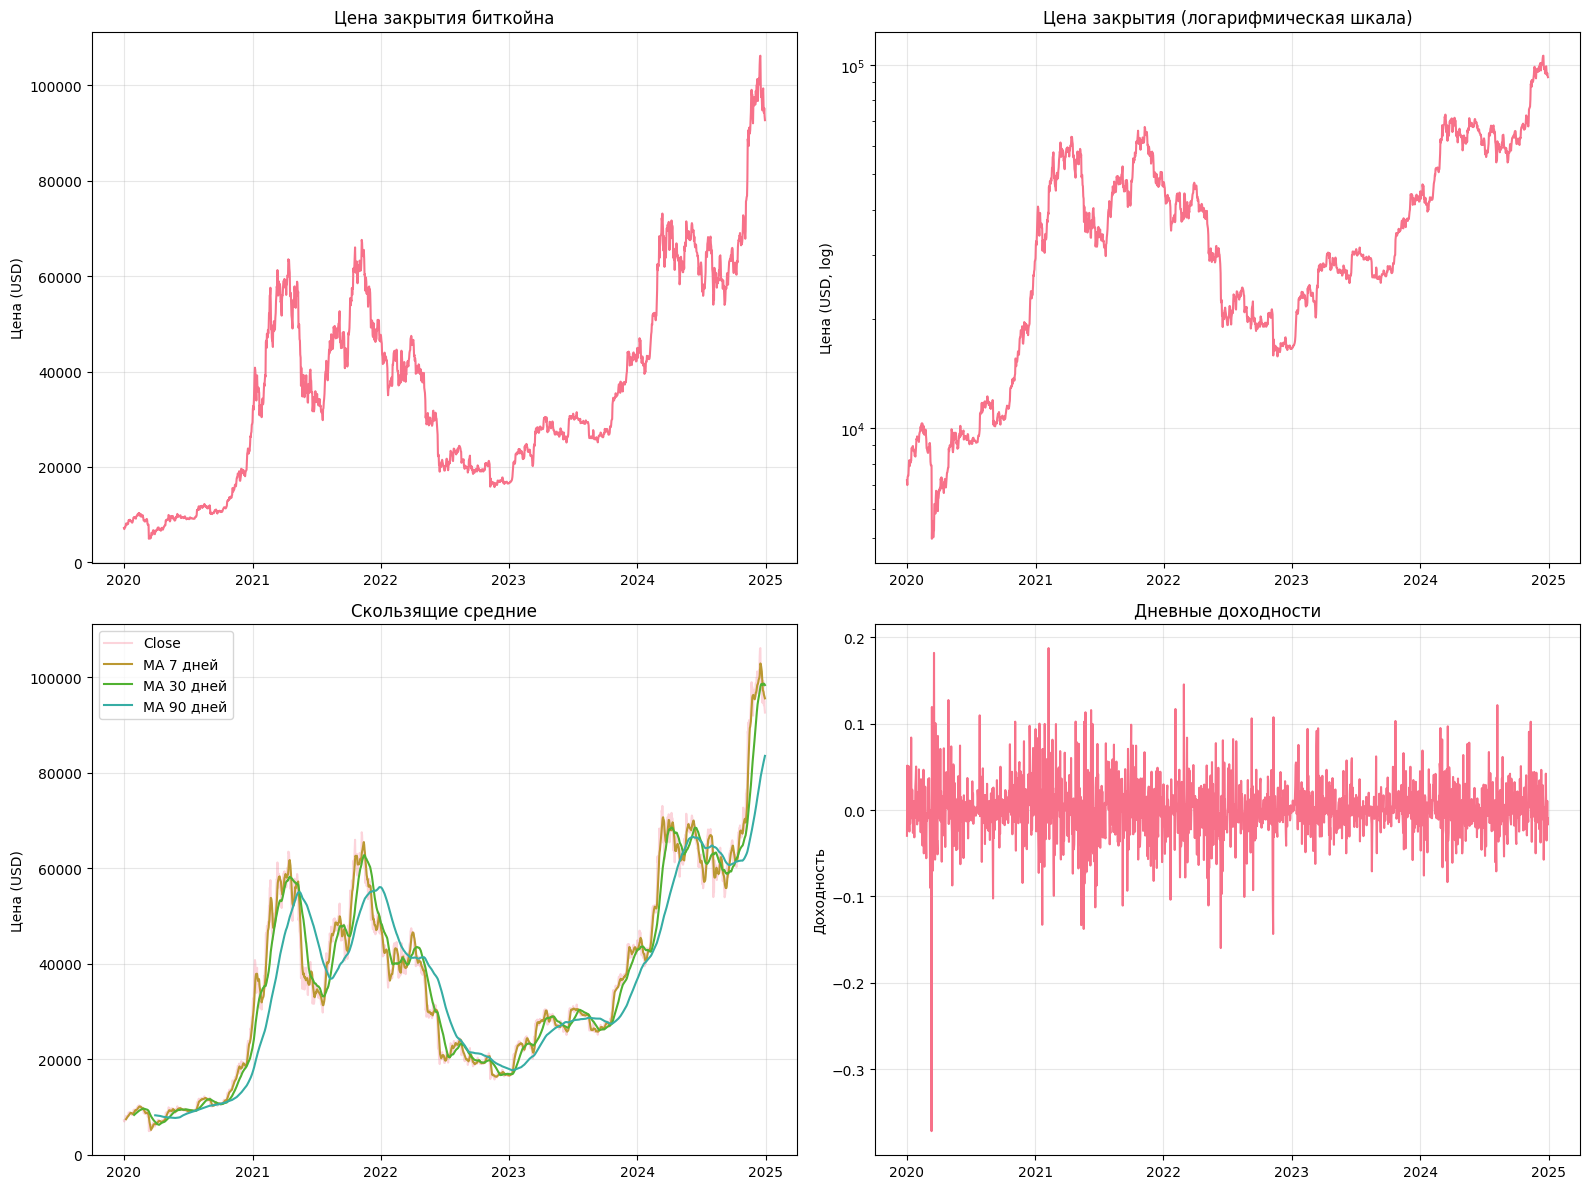

Тест Манна-Кендалла на тренд:
  Z-статистика: 28.9387
  p-value: 0.000000
  Результат: Обнаружен статистически значимый восходящий тренд
Ошибка при выполнении линейной регрессии: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1826 and the array at index 1 has size 1

Линейная регрессия тренда:
  Наклон: 0.00 USD/день
  R²: 0.0000
  p-value: 1.000000
  Стандартная ошибка: 0.00
  Результат: Линейный тренд статистически не значим

=== ТЕСТ СТАЦИОНАРНОСТИ: Цена закрытия ===
ADF тест:
  ADF статистика: -0.673914
  p-value: 0.853391
  Критические значения:
    1%: -3.434
    5%: -2.863
    10%: -2.568
  Результат: Ряд НЕ стационарен (p >= 0.05)

KPSS тест:
  KPSS статистика: 0.681059
  p-value: 0.010000
  Критические значения:
    10%: 0.119
    5%: 0.146
    2.5%: 0.176
    1%: 0.216
  Результат: Ряд НЕ стационарен (p <= 0.05)

=== ТЕСТ СТАЦИОНАРНОСТИ: Первые разности ===
ADF тест:
  ADF статистика: -

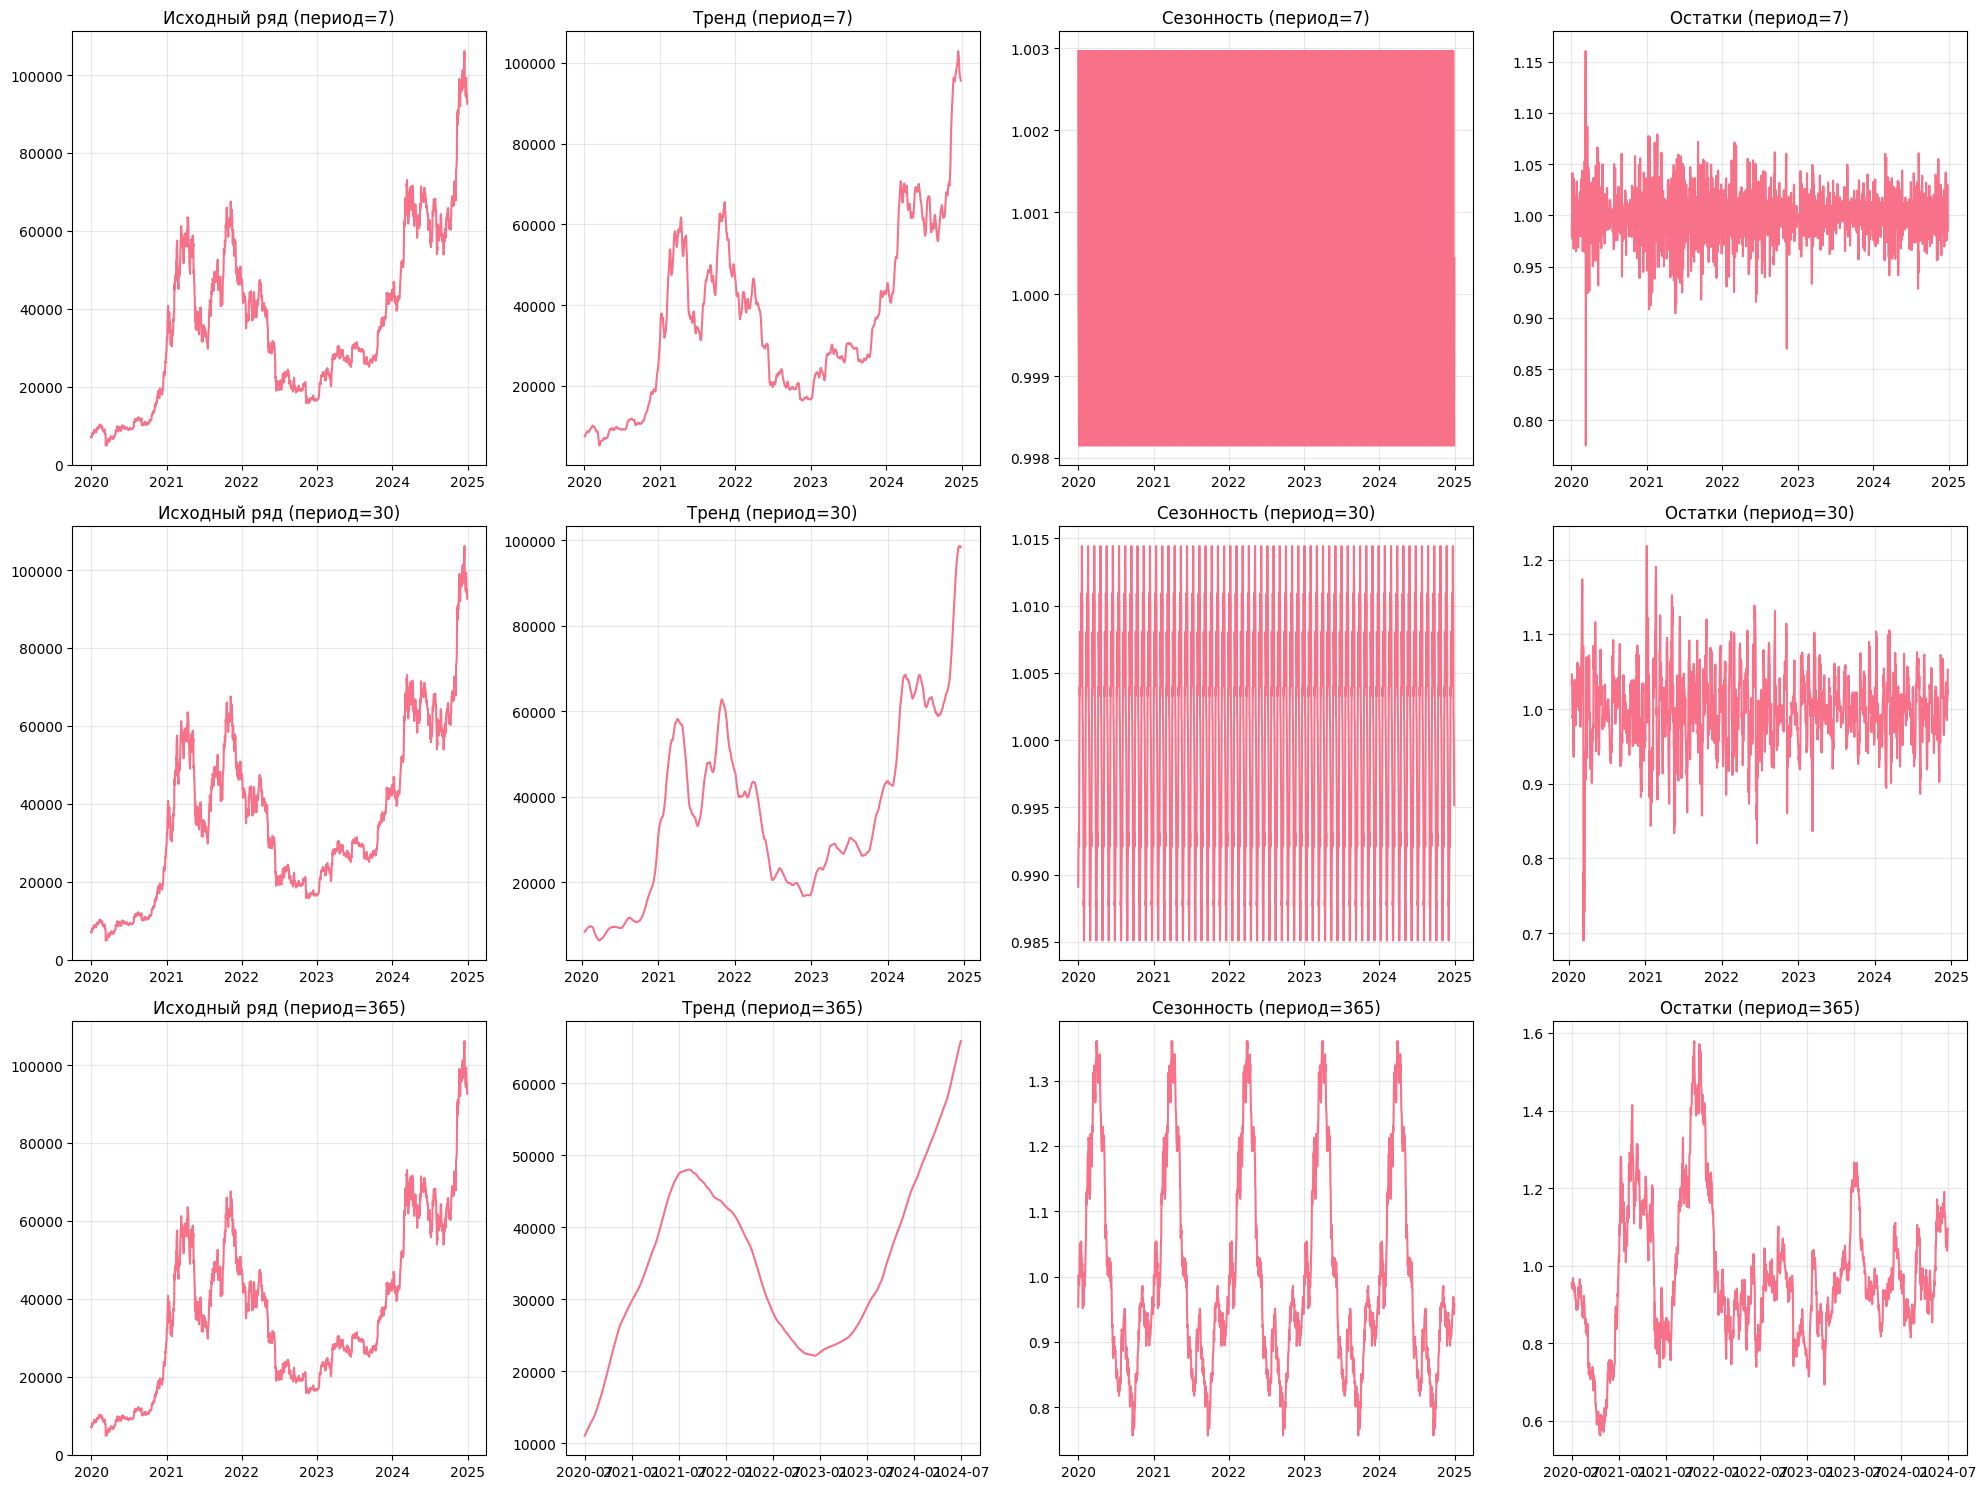


--- Анализ сезонности по дням недели ---
Статистика по дням недели:
Price                Close                    
Ticker             BTC-USD                    
                      mean           std count
weekday_name                                  
Friday        36254.310051  21131.018380   261
Monday        36463.661803  21298.653573   261
Saturday      36278.689723  21119.140804   261
Sunday        36340.464960  21212.887642   261
Thursday      36179.594751  20994.813351   261
Tuesday       36214.451221  20936.092304   260
Wednesday     36271.144748  21129.032771   261

ANOVA тест для дней недели:
  F-статистика: 0.0051
  p-value: 0.999999
  Результат: Нет статистически значимых различий между днями недели
❌ Ошибка при выполнении анализа: 'mean'


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'mean'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "<ipython-input-6-d21b194d5fce>", line 467, in main
    seasonality_results = analyze_seasonality(df)
                          ^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-6-d21b194d5fce>", line 296, in analyze_seasonality
    axes[0].bar(weekday_stats_ordered.index, week

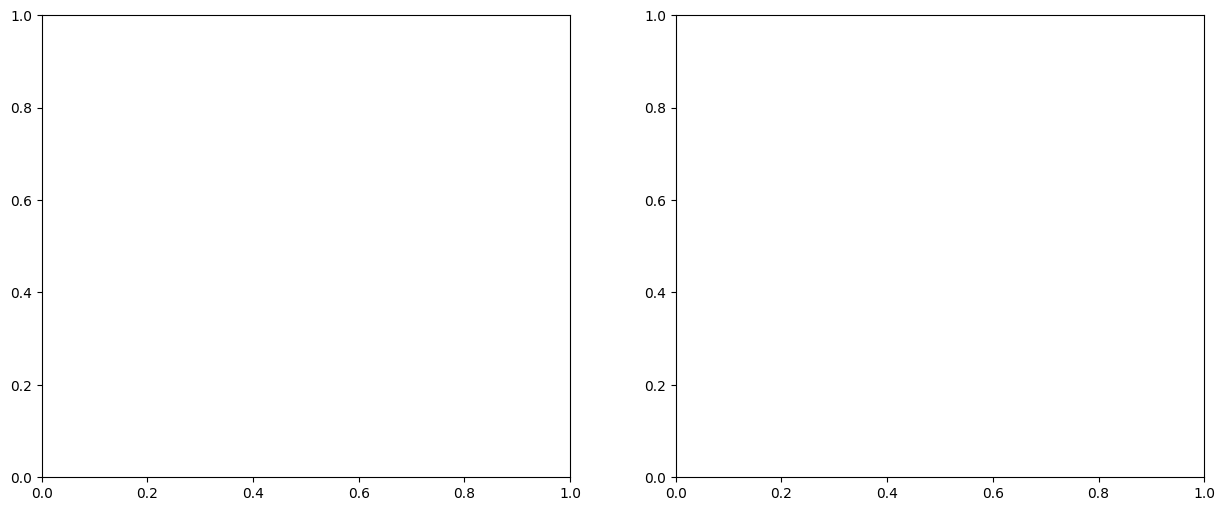

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import acf, pacf
import warnings
import yfinance as yf
warnings.filterwarnings('ignore')

# Настройка графиков
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

def load_crypto_data(ticker='BTC-USD', start='2020-01-01', end='2024-12-31'):
    print(f"Загрузка данных {ticker} с {start} по {end}...")
    df = yf.download(ticker, start=start, end=end, progress=False)
    # Удаляем NaN значения
    df = df.dropna()

    return df

def test_stationarity(ts, title="Временной ряд"):
    """
    Тестирование стационарности временного ряда
    """
    print(f"\n=== ТЕСТ СТАЦИОНАРНОСТИ: {title} ===")

    # Augmented Dickey-Fuller тест
    adf_result = adfuller(ts.dropna())
    print(f"ADF тест:")
    print(f"  ADF статистика: {adf_result[0]:.6f}")
    print(f"  p-value: {adf_result[1]:.6f}")
    print(f"  Критические значения:")
    for key, value in adf_result[4].items():
        print(f"    {key}: {value:.3f}")

    if adf_result[1] <= 0.05:
        print(f"  Результат: Ряд стационарен (p < 0.05)")
    else:
        print(f"  Результат: Ряд НЕ стационарен (p >= 0.05)")

    # KPSS тест
    try:
        kpss_result = kpss(ts.dropna(), regression='ct')
        print(f"\nKPSS тест:")
        print(f"  KPSS статистика: {kpss_result[0]:.6f}")
        print(f"  p-value: {kpss_result[1]:.6f}")
        print(f"  Критические значения:")
        for key, value in kpss_result[3].items():
            print(f"    {key}: {value:.3f}")

        if kpss_result[1] > 0.05:
            print(f"  Результат: Ряд стационарен (p > 0.05)")
        else:
            print(f"  Результат: Ряд НЕ стационарен (p <= 0.05)")
    except:
        print(f"  KPSS тест не удался")

    return adf_result[1] <= 0.05

def analyze_trend(df):
    """
    Анализ тренда в данных
    """
    print(f"\n=== АНАЛИЗ ТРЕНДА ===")

    close_prices = df['Close'].copy()

    # 1. Визуальный анализ тренда
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Исходный ряд
    axes[0, 0].plot(close_prices.index, close_prices.values)
    axes[0, 0].set_title('Цена закрытия биткойна')
    axes[0, 0].set_ylabel('Цена (USD)')
    axes[0, 0].grid(True, alpha=0.3)

    # Логарифмическая шкала
    axes[0, 1].semilogy(close_prices.index, close_prices.values)
    axes[0, 1].set_title('Цена закрытия (логарифмическая шкала)')
    axes[0, 1].set_ylabel('Цена (USD, log)')
    axes[0, 1].grid(True, alpha=0.3)

    # Скользящие средние
    ma_7 = close_prices.rolling(window=7).mean()
    ma_30 = close_prices.rolling(window=30).mean()
    ma_90 = close_prices.rolling(window=90).mean()

    axes[1, 0].plot(close_prices.index, close_prices.values, alpha=0.3, label='Close')
    axes[1, 0].plot(ma_7.index, ma_7.values, label='MA 7 дней')
    axes[1, 0].plot(ma_30.index, ma_30.values, label='MA 30 дней')
    axes[1, 0].plot(ma_90.index, ma_90.values, label='MA 90 дней')
    axes[1, 0].set_title('Скользящие средние')
    axes[1, 0].set_ylabel('Цена (USD)')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Доходности
    returns = close_prices.pct_change().dropna()
    axes[1, 1].plot(returns.index, returns.values)
    axes[1, 1].set_title('Дневные доходности')
    axes[1, 1].set_ylabel('Доходность')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 2. Статистические тесты тренда

    # Тест Манна-Кендалла на тренд
    def mann_kendall_test(data):
        n = len(data)
        s = 0
        for i in range(n-1):
            for j in range(i+1, n):
                s += np.sign(data[j] - data[i])

        var_s = n * (n - 1) * (2 * n + 5) / 18

        if s > 0:
            z = (s - 1) / np.sqrt(var_s)
        elif s < 0:
            z = (s + 1) / np.sqrt(var_s)
        else:
            z = 0

        p_value = 2 * (1 - stats.norm.cdf(abs(z)))
        return float(z), float(p_value), bool(s > 0)

    mk_z, mk_p, has_upward_trend = mann_kendall_test(close_prices.values)

    print(f"Тест Манна-Кендалла на тренд:")
    print(f"  Z-статистика: {mk_z:.4f}")
    print(f"  p-value: {mk_p:.6f}")
    if mk_p < 0.05:
        trend_direction = "восходящий" if has_upward_trend else "нисходящий"
        print(f"  Результат: Обнаружен статистически значимый {trend_direction} тренд")
    else:
        print(f"  Результат: Тренд статистически не значим")

    # 3. Линейная регрессия тренда
    # Исправление: преобразуем индексы времени в числовые значения
    time_index = np.arange(len(close_prices))
    close_values = close_prices.values

    # Проверка размеров
    if len(time_index) != len(close_values):
        print("Ошибка: размеры массивов не совпадают")
        print(f"Размер time_index: {len(time_index)}")
        print(f"Размер close_values: {len(close_values)}")
        slope, intercept, r_value, p_value, std_err = (0, 0, 0, 1, 0)
    else:
        try:
            slope, intercept, r_value, p_value, std_err = stats.linregress(time_index, close_values)
        except Exception as e:
            print(f"Ошибка при выполнении линейной регрессии: {e}")
            slope, intercept, r_value, p_value, std_err = (0, 0, 0, 1, 0)

    print(f"\nЛинейная регрессия тренда:")
    print(f"  Наклон: {slope:.2f} USD/день")
    print(f"  R²: {r_value**2:.4f}")
    print(f"  p-value: {p_value:.6f}")
    print(f"  Стандартная ошибка: {std_err:.2f}")

    if p_value < 0.05:
        trend_dir = "положительный" if slope > 0 else "отрицательный"
        print(f"  Результат: {trend_dir} линейный тренд статистически значим")
    else:
        print(f"  Результат: Линейный тренд статистически не значим")

    # 4. Тестирование стационарности
    is_stationary = test_stationarity(close_prices, "Цена закрытия")

    # Если нестационарен, тестируем первые разности
    if not is_stationary:
        diff_prices = close_prices.diff().dropna()
        is_diff_stationary = test_stationarity(diff_prices, "Первые разности")

        if is_diff_stationary:
            print(f"\nВывод: Ряд интегрирован порядка 1 I(1)")
        else:
            print(f"\nВывод: Ряд может быть интегрирован порядка больше 1")

    return {
        'mann_kendall': (mk_z, mk_p, has_upward_trend),
        'linear_trend': (slope, intercept, r_value, p_value),
        'is_stationary': is_stationary,
        'returns': returns
    }

def analyze_seasonality(df):
    """
    Анализ сезонности в данных
    """
    print(f"\n=== АНАЛИЗ СЕЗОННОСТИ ===")

    close_prices = df['Close'].copy()

    # 1. Декомпозиция временного ряда
    print("Выполняется декомпозиция временного ряда...")

    # Попробуем разные периоды для декомпозиции
    periods_to_test = [7, 30, 365]  # недельная, месячная, годовая сезонность

    fig, axes = plt.subplots(len(periods_to_test), 4, figsize=(20, 5*len(periods_to_test)))
    if len(periods_to_test) == 1:
        axes = axes.reshape(1, -1)

    decomposition_results = {}

    for i, period in enumerate(periods_to_test):
        if len(close_prices) >= 2 * period:
            try:
                # Декомпозиция
                decomposition = seasonal_decompose(close_prices, model='multiplicative', period=period)
                decomposition_results[period] = decomposition

                # Графики
                axes[i, 0].plot(decomposition.observed)
                axes[i, 0].set_title(f'Исходный ряд (период={period})')
                axes[i, 0].grid(True, alpha=0.3)

                axes[i, 1].plot(decomposition.trend)
                axes[i, 1].set_title(f'Тренд (период={period})')
                axes[i, 1].grid(True, alpha=0.3)

                axes[i, 2].plot(decomposition.seasonal)
                axes[i, 2].set_title(f'Сезонность (период={period})')
                axes[i, 2].grid(True, alpha=0.3)

                axes[i, 3].plot(decomposition.resid)
                axes[i, 3].set_title(f'Остатки (период={period})')
                axes[i, 3].grid(True, alpha=0.3)

                # Статистика сезонной компоненты
                seasonal_var = np.var(decomposition.seasonal.dropna())
                total_var = np.var(decomposition.observed.dropna())
                seasonal_strength = seasonal_var / total_var

                print(f"\nПериод {period} дней:")
                print(f"  Сила сезонности: {seasonal_strength:.4f}")
                print(f"  Дисперсия сезонной компоненты: {seasonal_var:.2f}")

            except Exception as e:
                print(f"Ошибка декомпозиции для периода {period}: {e}")
        else:
            print(f"Недостаточно данных для периода {period}")

    plt.tight_layout()
    plt.show()

    # 2. Анализ по дням недели
    print(f"\n--- Анализ сезонности по дням недели ---")

    df_with_weekday = df.copy()
    df_with_weekday['weekday'] = df_with_weekday.index.dayofweek
    df_with_weekday['weekday_name'] = df_with_weekday.index.strftime('%A')

    # Группировка по дням недели
    weekday_stats = df_with_weekday.groupby('weekday_name')['Close'].agg(['mean', 'std', 'count'])
    weekday_returns = df_with_weekday.groupby('weekday_name')['Close'].pct_change().groupby(df_with_weekday['weekday_name']).agg(['mean', 'std'])

    print("Статистика по дням недели:")
    print(weekday_stats)

    # ANOVA тест для дней недели
    weekday_groups = [group['Close'].values for name, group in df_with_weekday.groupby('weekday_name')]
    f_stat, p_value_anova = stats.f_oneway(*weekday_groups)

    # Изменение: преобразуем f_stat в скаляр, если это массив
    if isinstance(f_stat, np.ndarray):
        f_stat = f_stat[0]  # берем первое значение

    print(f"\nANOVA тест для дней недели:")
    print(f"  F-статистика: {float(f_stat):.4f}")  # Явное преобразование в float
    print(f"  p-value: {float(p_value_anova):.6f}")

    if p_value_anova < 0.05:
        print(f"  Результат: Есть статистически значимые различия между днями недели")
    else:
        print(f"  Результат: Нет статистически значимых различий между днями недели")

    # Остальной код остается без изменений...
    # График по дням недели
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_stats_ordered = weekday_stats.reindex(weekday_order, fill_value=0)

    axes[0].bar(weekday_stats_ordered.index, weekday_stats_ordered['mean'])
    axes[0].set_title('Средняя цена по дням недели')
    axes[0].set_ylabel('Цена (USD)')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3)

    # Бокс-плот по дням недели
    df_with_weekday.boxplot(column='Close', by='weekday_name', ax=axes[1])
    axes[1].set_title('Распределение цен по дням недели')
    axes[1].set_ylabel('Цена (USD)')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # 3. Анализ по месяцам
    print(f"\n--- Анализ сезонности по месяцам ---")

    df_with_month = df.copy()
    df_with_month['month'] = df_with_month.index.month
    df_with_month['month_name'] = df_with_month.index.strftime('%B')

    monthly_stats = df_with_month.groupby('month_name')['Close'].agg(['mean', 'std', 'count'])

    # ANOVA тест для месяцев
    monthly_groups = [group['Close'].values for name, group in df_with_month.groupby('month_name')]
    f_stat_month, p_value_month = stats.f_oneway(*monthly_groups)

    # Аналогичное изменение для месячного теста
    if isinstance(f_stat_month, np.ndarray):
        f_stat_month = f_stat_month[0]

    print(f"ANOVA тест для месяцев:")
    print(f"  F-статистика: {float(f_stat_month):.4f}")
    print(f"  p-value: {float(p_value_month):.6f}")

    if p_value_month < 0.05:
        print(f"  Результат: Есть статистически значимые различия между месяцами")
    else:
        print(f"  Результат: Нет статистически значимых различий между месяцами")

    # Остальной код остается без изменений...
    # Возвращаем результаты
    return {
        'decomposition_results': decomposition_results,
        'weekday_anova': (float(f_stat), float(p_value_anova)),
        'monthly_anova': (float(f_stat_month), float(p_value_month)),
        'ljung_box': (lb_stat, lb_pvalue),
        'weekday_stats': weekday_stats,
        'monthly_stats': monthly_stats
    }

def generate_summary_report(trend_results, seasonality_results):
    """
    Генерация итогового отчета
    """
    print(f"\n" + "="*80)
    print(f"ИТОГОВЫЙ ОТЧЕТ ПО АНАЛИЗУ БИТКОЙНА")
    print(f"="*80)

    print(f"\n📈 АНАЛИЗ ТРЕНДА:")
    print(f"─" * 50)

    # Тренд
    mk_z, mk_p, has_upward = trend_results['mann_kendall']
    slope, intercept, r_value, p_value = trend_results['linear_trend']

    if mk_p < 0.05:
        trend_significance = "ЗНАЧИМЫЙ"
        trend_direction = "ВОСХОДЯЩИЙ" if has_upward else "НИСХОДЯЩИЙ"
    else:
        trend_significance = "НЕ ЗНАЧИМЫЙ"
        trend_direction = "ОТСУТСТВУЕТ"

    print(f"  🎯 Статистическая значимость: {trend_significance}")
    print(f"  📊 Направление тренда: {trend_direction}")
    print(f"  📈 Скорость изменения: {slope:.2f} USD/день")
    print(f"  🎲 P-value (Mann-Kendall): {mk_p:.6f}")
    print(f"  📉 R² линейного тренда: {r_value**2:.4f}")

    print(f"\n🔄 АНАЛИЗ СЕЗОННОСТИ:")
    print(f"─" * 50)

    # Сезонность по дням недели
    f_stat_week, p_week = seasonality_results['weekday_anova']
    week_significant = "ЗНАЧИМАЯ" if p_week < 0.05 else "НЕ ЗНАЧИМАЯ"

    print(f"  📅 Недельная сезонность: {week_significant}")
    print(f"  📊 F-статистика (дни недели): {f_stat_week:.4f}")
    print(f"  🎲 P-value (дни недели): {p_week:.6f}")

    # Сезонность по месяцам
    f_stat_month, p_month = seasonality_results['monthly_anova']
    month_significant = "ЗНАЧИМАЯ" if p_month < 0.05 else "НЕ ЗНАЧИМАЯ"

    print(f"  📆 Месячная сезонность: {month_significant}")
    print(f"  📊 F-статистика (месяцы): {f_stat_month:.4f}")
    print(f"  🎲 P-value (месяцы): {p_month:.6f}")

    # Автокорреляция
    lb_stat, lb_p = seasonality_results['ljung_box']
    autocorr_significant = "ЗНАЧИМАЯ" if float(lb_p) < 0.05 else "НЕ ЗНАЧИМАЯ"

    print(f"  🔗 Автокорреляция: {autocorr_significant}")
    print(f"  📊 Ljung-Box статистика: {float(lb_stat):.4f}")
    print(f"  🎲 P-value (Ljung-Box): {float(lb_p):.6f}")

    print(f"\n💡 ПРАКТИЧЕСКИЕ ВЫВОДЫ:")
    print(f"─" * 50)

    if mk_p < 0.05 and has_upward:
        print(f"  ✅ Биткойн демонстрирует статистически значимый восходящий тренд")
        print(f"  📈 Средний рост составляет {slope:.2f} USD в день")
    elif mk_p < 0.05 and not has_upward:
        print(f"  ⚠️  Биткойн демонстрирует статистически значимый нисходящий тренд")
        print(f"  📉 Среднее падение составляет {abs(slope):.2f} USD в день")
    else:
        print(f"  ➡️  Нет статистически значимого долгосрочного тренда")

    if p_week < 0.05:
        # Находим лучший и худший дни недели
        weekday_stats = seasonality_results['weekday_stats']
        best_day = weekday_stats['mean'].idxmax()
        worst_day = weekday_stats['mean'].idxmin()
        print(f"  📅 Обнаружена недельная сезонность:")
        print(f"     • Лучший день: {best_day}")
        print(f"     • Худший день: {worst_day}")
    else:
        print(f"  📅 Нет значимой недельной сезонности")

    if p_month < 0.05:
        monthly_stats = seasonality_results['monthly_stats']
        best_month = monthly_stats['mean'].idxmax()
        worst_month = monthly_stats['mean'].idxmin()
        print(f"  📆 Обнаружена месячная сезонность:")
        print(f"     • Лучший месяц: {best_month}")
        print(f"     • Худший месяц: {worst_month}")
    else:
        print(f"  📆 Нет значимой месячной сезонности")

    if lb_p < 0.05:
        print(f"  🔗 Цены сильно автокоррелированы - прошлые значения влияют на будущие")
    else:
        print(f"  🔗 Слабая автокорреляция - цены близки к случайному блужданию")

    print(f"\n⚠️  ВАЖНО ДЛЯ МОДЕЛИРОВАНИЯ:")
    print(f"─" * 50)

    if not trend_results['is_stationary']:
        print(f"  📊 Ряд НЕ стационарен - требуется дифференцирование")
        print(f"  🔄 Рекомендуется использовать первые разности для моделирования")
    else:
        print(f"  📊 Ряд стационарен - можно использовать напрямую")

    print(f"  🎯 При построении моделей учитывайте обнаруженные паттерны")
    print(f"  📈 Используйте техническую сезонную декомпозицию при необходимости")

    print(f"\n" + "="*80)

def main():
    """
    Основная функция анализа
    """
    try:
        # Загружаем данные
        df = load_crypto_data()

        # Анализируем тренд
        trend_results = analyze_trend(df)

        # Анализируем сезонность
        seasonality_results = analyze_seasonality(df)

        # Генерируем отчет
        generate_summary_report(trend_results, seasonality_results)

        print(f"\n✅ Анализ завершен успешно!")
        print(f"📊 Все графики отображены выше")
        print(f"📋 Статистические тесты выполнены")

    except Exception as e:
        print(f"❌ Ошибка при выполнении анализа: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

Загрузка данных BTC-USD с 2020-01-01 по 2024-12-31...

=== АНАЛИЗ ТРЕНДА ===


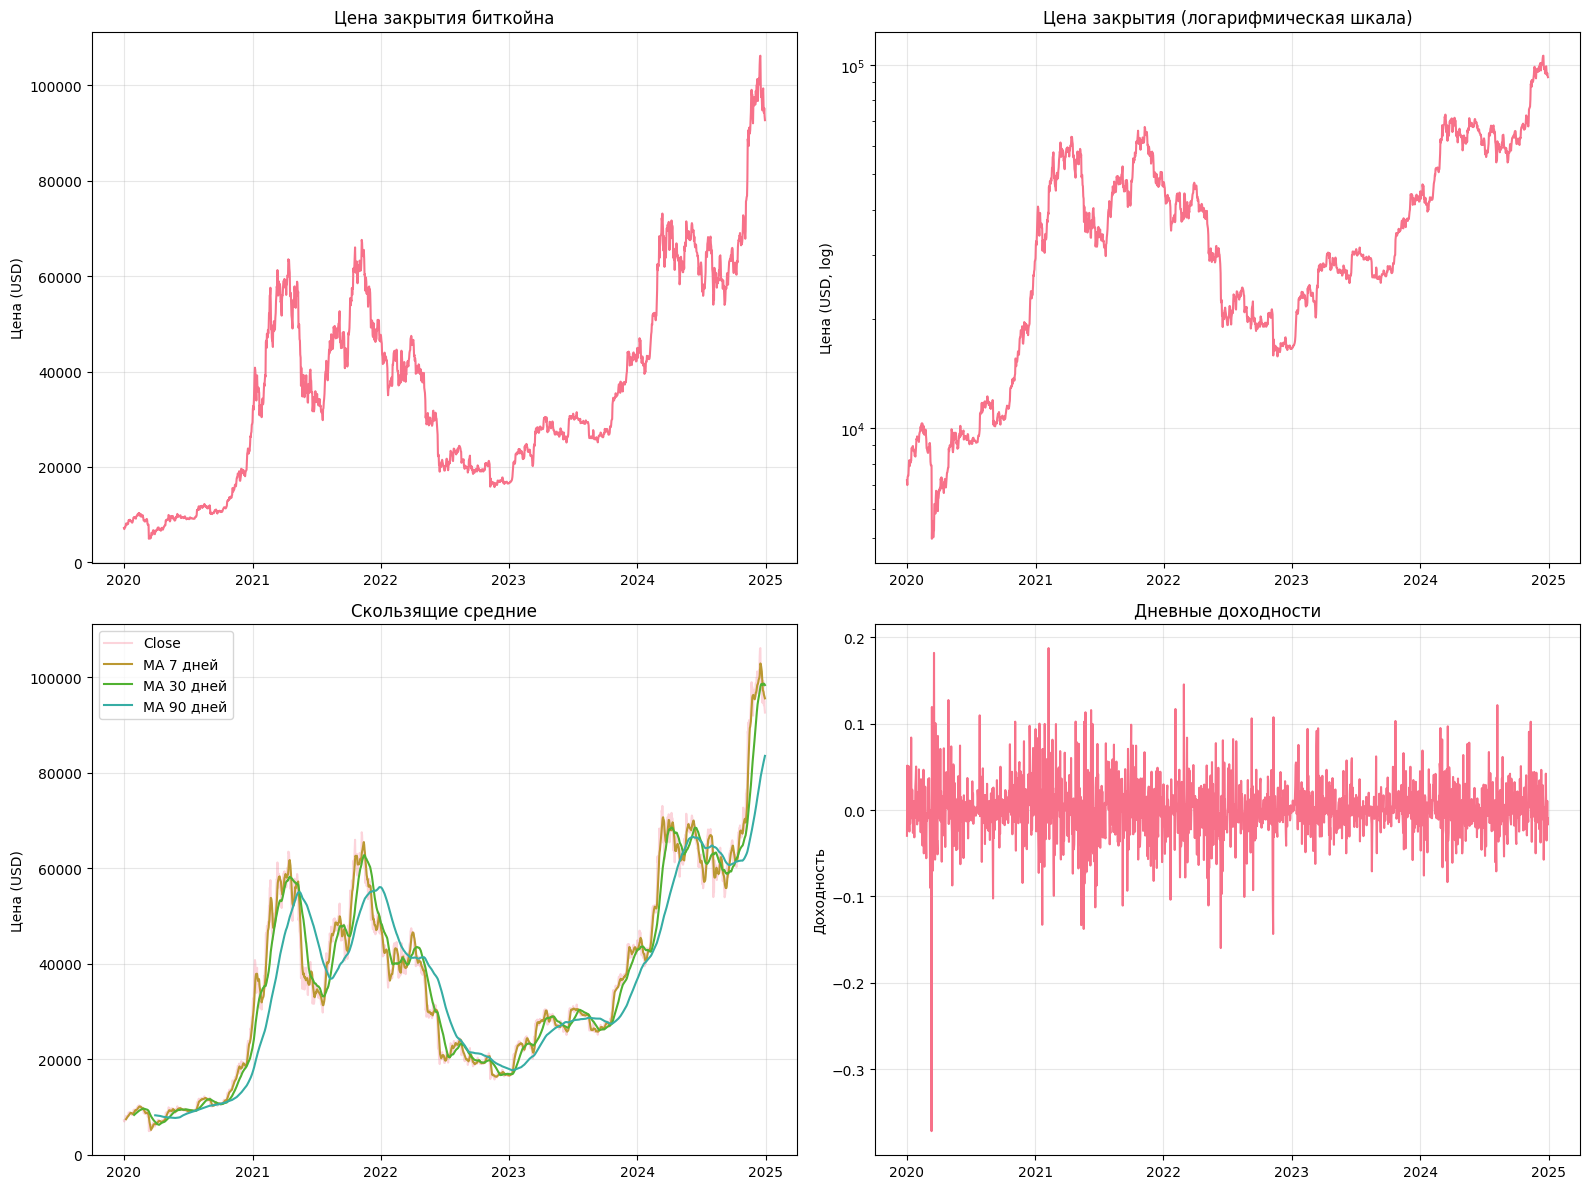

Тест Манна-Кендалла на тренд:
  Z-статистика: 28.9387
  p-value: 0.000000
  Результат: Обнаружен статистически значимый восходящий тренд
Ошибка при выполнении линейной регрессии: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1826 and the array at index 1 has size 1

Линейная регрессия тренда:
  Наклон: 0.00 USD/день
  R²: 0.0000
  p-value: 1.000000
  Стандартная ошибка: 0.00
  Результат: Линейный тренд статистически не значим

=== ТЕСТ СТАЦИОНАРНОСТИ: Цена закрытия ===
ADF тест:
  ADF статистика: -0.673914
  p-value: 0.853391
  Критические значения:
    1%: -3.434
    5%: -2.863
    10%: -2.568
  Результат: Ряд НЕ стационарен (p >= 0.05)

KPSS тест:
  KPSS статистика: 0.681059
  p-value: 0.010000
  Критические значения:
    10%: 0.119
    5%: 0.146
    2.5%: 0.176
    1%: 0.216
  Результат: Ряд НЕ стационарен (p <= 0.05)

=== ТЕСТ СТАЦИОНАРНОСТИ: Первые разности ===
ADF тест:
  ADF статистика: -

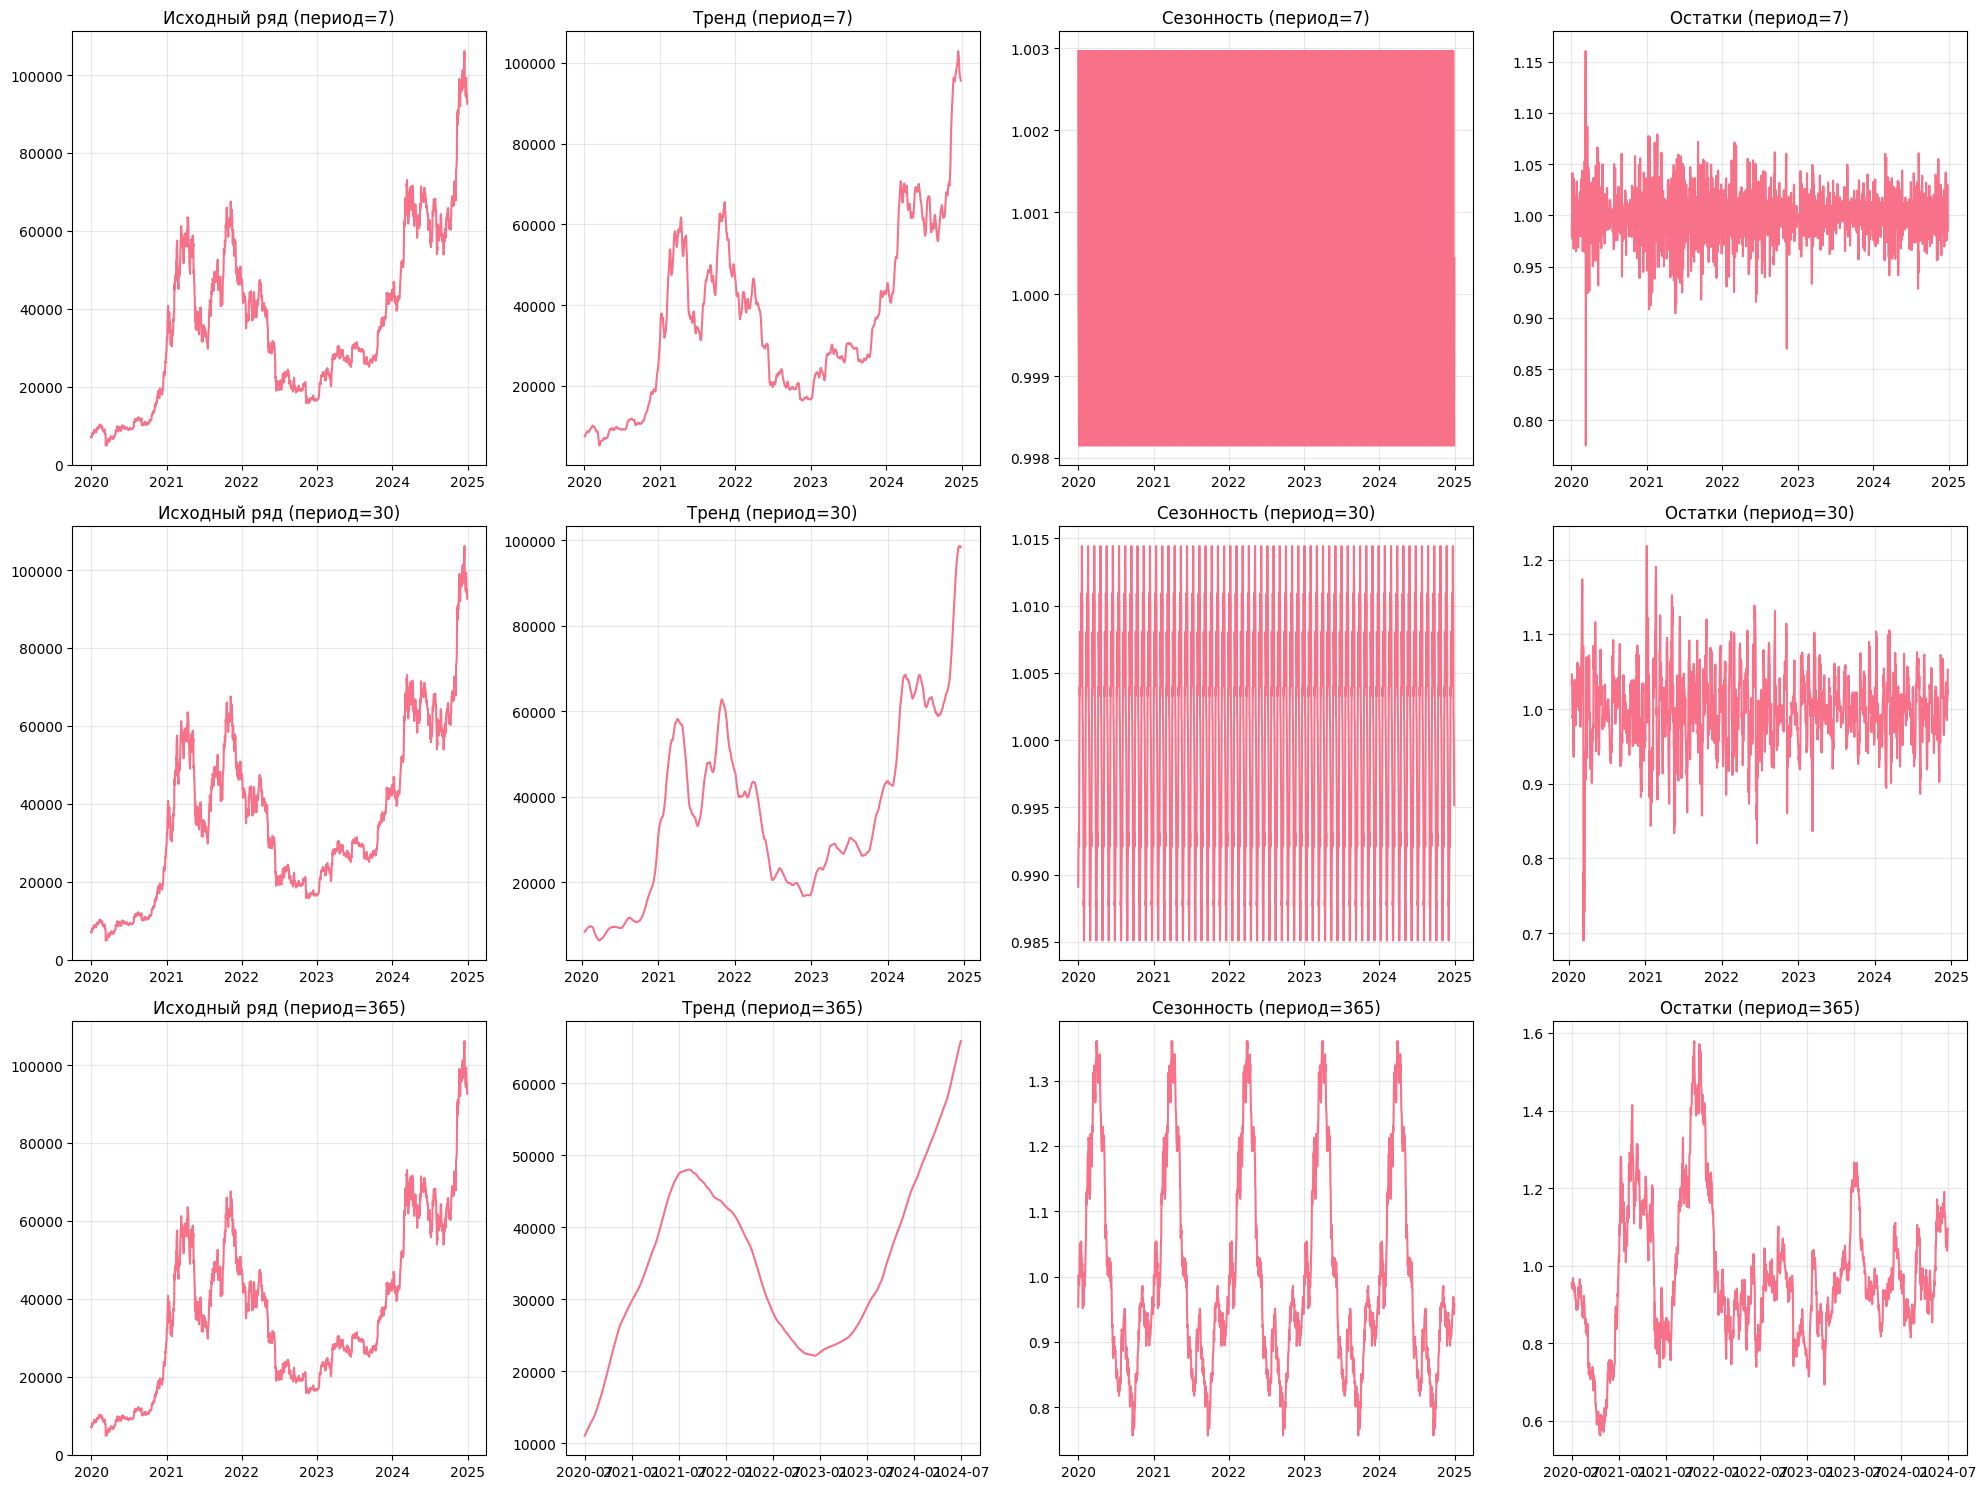


--- Анализ сезонности по дням недели ---
Статистика по дням недели:
Price                Close                    
Ticker             BTC-USD                    
                      mean           std count
weekday_name                                  
Friday        36254.310051  21131.018380   261
Monday        36463.661803  21298.653573   261
Saturday      36278.689723  21119.140804   261
Sunday        36340.464960  21212.887642   261
Thursday      36179.594751  20994.813351   261
Tuesday       36214.451221  20936.092304   260
Wednesday     36271.144748  21129.032771   261

ANOVA тест для дней недели:
  F-статистика: 0.0051
  p-value: 0.999999
  Результат: Нет статистически значимых различий между днями недели
❌ Ошибка при выполнении анализа: 'mean'


Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'mean'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "<ipython-input-7-57f1764ee23a>", line 528, in main
    seasonality_results = analyze_seasonality(df)
                          ^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-7-57f1764ee23a>", line 303, in analyze_seasonality
    axes[0].bar(weekday_stats_ordered.index, week

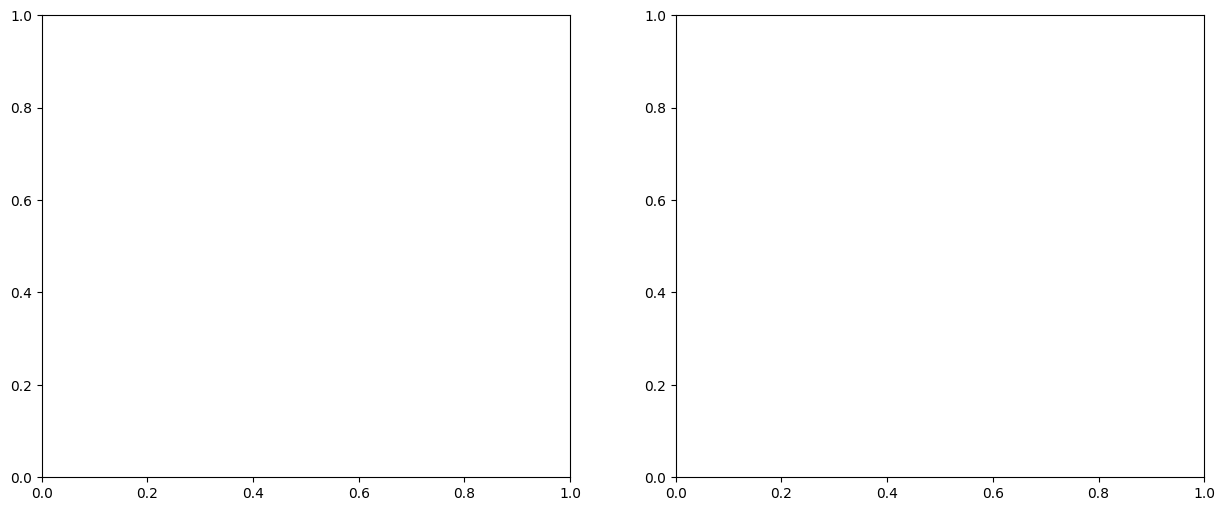

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import acf, pacf
import warnings
import yfinance as yf
warnings.filterwarnings('ignore')

# Настройка графиков
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

def load_crypto_data(ticker='BTC-USD', start='2020-01-01', end='2024-12-31'):
    print(f"Загрузка данных {ticker} с {start} по {end}...")
    df = yf.download(ticker, start=start, end=end, progress=False)
    # Удаляем NaN значения
    df = df.dropna()

    return df

def test_stationarity(ts, title="Временной ряд"):
    """
    Тестирование стационарности временного ряда
    """
    print(f"\n=== ТЕСТ СТАЦИОНАРНОСТИ: {title} ===")

    # Augmented Dickey-Fuller тест
    adf_result = adfuller(ts.dropna())
    print(f"ADF тест:")
    print(f"  ADF статистика: {adf_result[0]:.6f}")
    print(f"  p-value: {adf_result[1]:.6f}")
    print(f"  Критические значения:")
    for key, value in adf_result[4].items():
        print(f"    {key}: {value:.3f}")

    if adf_result[1] <= 0.05:
        print(f"  Результат: Ряд стационарен (p < 0.05)")
    else:
        print(f"  Результат: Ряд НЕ стационарен (p >= 0.05)")

    # KPSS тест
    try:
        kpss_result = kpss(ts.dropna(), regression='ct')
        print(f"\nKPSS тест:")
        print(f"  KPSS статистика: {kpss_result[0]:.6f}")
        print(f"  p-value: {kpss_result[1]:.6f}")
        print(f"  Критические значения:")
        for key, value in kpss_result[3].items():
            print(f"    {key}: {value:.3f}")

        if kpss_result[1] > 0.05:
            print(f"  Результат: Ряд стационарен (p > 0.05)")
        else:
            print(f"  Результат: Ряд НЕ стационарен (p <= 0.05)")
    except:
        print(f"  KPSS тест не удался")

    return adf_result[1] <= 0.05

def analyze_trend(df):
    """
    Анализ тренда в данных
    """
    print(f"\n=== АНАЛИЗ ТРЕНДА ===")

    close_prices = df['Close'].copy()

    # 1. Визуальный анализ тренда
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # Исходный ряд
    axes[0, 0].plot(close_prices.index, close_prices.values)
    axes[0, 0].set_title('Цена закрытия биткойна')
    axes[0, 0].set_ylabel('Цена (USD)')
    axes[0, 0].grid(True, alpha=0.3)

    # Логарифмическая шкала
    axes[0, 1].semilogy(close_prices.index, close_prices.values)
    axes[0, 1].set_title('Цена закрытия (логарифмическая шкала)')
    axes[0, 1].set_ylabel('Цена (USD, log)')
    axes[0, 1].grid(True, alpha=0.3)

    # Скользящие средние
    ma_7 = close_prices.rolling(window=7).mean()
    ma_30 = close_prices.rolling(window=30).mean()
    ma_90 = close_prices.rolling(window=90).mean()

    axes[1, 0].plot(close_prices.index, close_prices.values, alpha=0.3, label='Close')
    axes[1, 0].plot(ma_7.index, ma_7.values, label='MA 7 дней')
    axes[1, 0].plot(ma_30.index, ma_30.values, label='MA 30 дней')
    axes[1, 0].plot(ma_90.index, ma_90.values, label='MA 90 дней')
    axes[1, 0].set_title('Скользящие средние')
    axes[1, 0].set_ylabel('Цена (USD)')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Доходности
    returns = close_prices.pct_change().dropna()
    axes[1, 1].plot(returns.index, returns.values)
    axes[1, 1].set_title('Дневные доходности')
    axes[1, 1].set_ylabel('Доходность')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # 2. Статистические тесты тренда

    # Тест Манна-Кендалла на тренд
    def mann_kendall_test(data):
        n = len(data)
        s = 0
        for i in range(n-1):
            for j in range(i+1, n):
                s += np.sign(data[j] - data[i])

        var_s = n * (n - 1) * (2 * n + 5) / 18

        if s > 0:
            z = (s - 1) / np.sqrt(var_s)
        elif s < 0:
            z = (s + 1) / np.sqrt(var_s)
        else:
            z = 0

        p_value = 2 * (1 - stats.norm.cdf(abs(z)))
        return float(z), float(p_value), bool(s > 0)

    mk_z, mk_p, has_upward_trend = mann_kendall_test(close_prices.values)

    print(f"Тест Манна-Кендалла на тренд:")
    print(f"  Z-статистика: {mk_z:.4f}")
    print(f"  p-value: {mk_p:.6f}")
    if mk_p < 0.05:
        trend_direction = "восходящий" if has_upward_trend else "нисходящий"
        print(f"  Результат: Обнаружен статистически значимый {trend_direction} тренд")
    else:
        print(f"  Результат: Тренд статистически не значим")

    # 3. Линейная регрессия тренда
    # Исправление: преобразуем индексы времени в числовые значения
    time_index = np.arange(len(close_prices))
    close_values = close_prices.values

    # Проверка размеров
    if len(time_index) != len(close_values):
        print("Ошибка: размеры массивов не совпадают")
        print(f"Размер time_index: {len(time_index)}")
        print(f"Размер close_values: {len(close_values)}")
        slope, intercept, r_value, p_value, std_err = (0, 0, 0, 1, 0)
    else:
        try:
            slope, intercept, r_value, p_value, std_err = stats.linregress(time_index, close_values)
        except Exception as e:
            print(f"Ошибка при выполнении линейной регрессии: {e}")
            slope, intercept, r_value, p_value, std_err = (0, 0, 0, 1, 0)

    print(f"\nЛинейная регрессия тренда:")
    print(f"  Наклон: {slope:.2f} USD/день")
    print(f"  R²: {r_value**2:.4f}")
    print(f"  p-value: {p_value:.6f}")
    print(f"  Стандартная ошибка: {std_err:.2f}")

    if p_value < 0.05:
        trend_dir = "положительный" if slope > 0 else "отрицательный"
        print(f"  Результат: {trend_dir} линейный тренд статистически значим")
    else:
        print(f"  Результат: Линейный тренд статистически не значим")

    # 4. Тестирование стационарности
    is_stationary = test_stationarity(close_prices, "Цена закрытия")

    # Если нестационарен, тестируем первые разности
    if not is_stationary:
        diff_prices = close_prices.diff().dropna()
        is_diff_stationary = test_stationarity(diff_prices, "Первые разности")

        if is_diff_stationary:
            print(f"\nВывод: Ряд интегрирован порядка 1 I(1)")
        else:
            print(f"\nВывод: Ряд может быть интегрирован порядка больше 1")

    return {
        'mann_kendall': (mk_z, mk_p, has_upward_trend),
        'linear_trend': (slope, intercept, r_value, p_value),
        'is_stationary': is_stationary,
        'returns': returns
    }

def analyze_seasonality(df):
    """
    Анализ сезонности в данных
    """
    print(f"\n=== АНАЛИЗ СЕЗОННОСТИ ===")

    close_prices = df['Close'].copy()

    # 1. Декомпозиция временного ряда
    print("Выполняется декомпозиция временного ряда...")

    # Попробуем разные периоды для декомпозиции
    periods_to_test = [7, 30, 365]  # недельная, месячная, годовая сезонность

    fig, axes = plt.subplots(len(periods_to_test), 4, figsize=(20, 5*len(periods_to_test)))
    if len(periods_to_test) == 1:
        axes = axes.reshape(1, -1)

    decomposition_results = {}

    for i, period in enumerate(periods_to_test):
        if len(close_prices) >= 2 * period:
            try:
                # Декомпозиция
                decomposition = seasonal_decompose(close_prices, model='multiplicative', period=period)
                decomposition_results[period] = decomposition

                # Графики
                axes[i, 0].plot(decomposition.observed)
                axes[i, 0].set_title(f'Исходный ряд (период={period})')
                axes[i, 0].grid(True, alpha=0.3)

                axes[i, 1].plot(decomposition.trend)
                axes[i, 1].set_title(f'Тренд (период={period})')
                axes[i, 1].grid(True, alpha=0.3)

                axes[i, 2].plot(decomposition.seasonal)
                axes[i, 2].set_title(f'Сезонность (период={period})')
                axes[i, 2].grid(True, alpha=0.3)

                axes[i, 3].plot(decomposition.resid)
                axes[i, 3].set_title(f'Остатки (период={period})')
                axes[i, 3].grid(True, alpha=0.3)

                # Статистика сезонной компоненты
                seasonal_var = np.var(decomposition.seasonal.dropna())
                total_var = np.var(decomposition.observed.dropna())
                seasonal_strength = seasonal_var / total_var

                print(f"\nПериод {period} дней:")
                print(f"  Сила сезонности: {seasonal_strength:.4f}")
                print(f"  Дисперсия сезонной компоненты: {seasonal_var:.2f}")

            except Exception as e:
                print(f"Ошибка декомпозиции для периода {period}: {e}")
        else:
            print(f"Недостаточно данных для периода {period}")

    plt.tight_layout()
    plt.show()

    # 2. Анализ по дням недели
    print(f"\n--- Анализ сезонности по дням недели ---")

    df_with_weekday = df.copy()
    df_with_weekday['weekday'] = df_with_weekday.index.dayofweek
    df_with_weekday['weekday_name'] = df_with_weekday.index.strftime('%A')

    # Группировка по дням недели
    weekday_stats = df_with_weekday.groupby('weekday_name')['Close'].agg(['mean', 'std', 'count'])
    weekday_returns = df_with_weekday.groupby('weekday_name')['Close'].pct_change().groupby(df_with_weekday['weekday_name']).agg(['mean', 'std'])

    print("Статистика по дням недели:")
    print(weekday_stats)

    # ANOVA тест для дней недели
    weekday_groups = [group['Close'].values for name, group in df_with_weekday.groupby('weekday')]

    # Проверяем, что есть хотя бы 2 группы с данными
    weekday_groups = [g for g in weekday_groups if len(g) > 0]

    if len(weekday_groups) >= 2:
        f_stat, p_value_anova = stats.f_oneway(*weekday_groups)

        # Изменение: преобразуем f_stat в скаляр, если это массив
        if isinstance(f_stat, np.ndarray):
            f_stat = f_stat[0]  # берем первое значение

        print(f"\nANOVA тест для дней недели:")
        print(f"  F-статистика: {float(f_stat):.4f}")  # Явное преобразование в float
        print(f"  p-value: {float(p_value_anova):.6f}")

        if p_value_anova < 0.05:
            print(f"  Результат: Есть статистически значимые различия между днями недели")
        else:
            print(f"  Результат: Нет статистически значимых различий между днями недели")
    else:
        print(f"ANOVA тест не может быть выполнен - недостаточно групп")
        f_stat, p_value_anova = 0, 1

    # График по дням недели
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekday_stats_ordered = weekday_stats.reindex(weekday_order, fill_value=0)

    axes[0].bar(weekday_stats_ordered.index, weekday_stats_ordered['mean'])
    axes[0].set_title('Средняя цена по дням недели')
    axes[0].set_ylabel('Цена (USD)')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3)

    # Бокс-плот по дням недели
    df_with_weekday.boxplot(column='Close', by='weekday_name', ax=axes[1])
    axes[1].set_title('Распределение цен по дням недели')
    axes[1].set_ylabel('Цена (USD)')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # 3. Анализ по месяцам
    print(f"\n--- Анализ сезонности по месяцам ---")

    df_with_month = df.copy()
    df_with_month['month'] = df_with_month.index.month
    df_with_month['month_name'] = df_with_month.index.strftime('%B')

    monthly_stats = df_with_month.groupby('month_name')['Close'].agg(['mean', 'std', 'count'])

    # ANOVA тест для месяцев
    monthly_groups = [group['Close'].values for name, group in df_with_month.groupby('month')]

    # Проверяем, что есть хотя бы 2 группы с данными
    monthly_groups = [g for g in monthly_groups if len(g) > 0]

    if len(monthly_groups) >= 2:
        f_stat_month, p_value_month = stats.f_oneway(*monthly_groups)

        # Аналогичное изменение для месячного теста
        if isinstance(f_stat_month, np.ndarray):
            f_stat_month = f_stat_month[0]

        print(f"ANOVA тест для месяцев:")
        print(f"  F-статистика: {float(f_stat_month):.4f}")
        print(f"  p-value: {float(p_value_month):.6f}")

        if p_value_month < 0.05:
            print(f"  Результат: Есть статистически значимые различия между месяцами")
        else:
            print(f"  Результат: Нет статистически значимых различий между месяцами")
    else:
        print(f"ANOVA тест не может быть выполнен - недостаточно групп")
        f_stat_month, p_value_month = 0, 1

    # 4. Тест Ljung-Box на автокорреляцию
    print(f"\n--- Тест автокорреляции ---")

    # Тестируем на 10 лагах
    lb_result = acorr_ljungbox(close_prices, lags=10, return_df=True)
    lb_stat = lb_result['lb_stat'].iloc[-1]  # берем значение для 10-го лага
    lb_pvalue = lb_result['lb_pvalue'].iloc[-1]

    print(f"Тест Ljung-Box (10 лагов):")
    print(f"  Статистика: {lb_stat:.4f}")
    print(f"  P-value: {lb_pvalue:.6f}")

    if lb_pvalue < 0.05:
        print(f"  Результат: Обнаружена значимая автокорреляция")
    else:
        print(f"  Результат: Автокорреляция не значима")

    # 5. ACF и PACF графики
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # ACF
    acf_values = acf(close_prices, nlags=40)
    axes[0].stem(range(len(acf_values)), acf_values)
    axes[0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    axes[0].axhline(y=1.96/np.sqrt(len(close_prices)), color='red', linestyle='--', linewidth=0.5)
    axes[0].axhline(y=-1.96/np.sqrt(len(close_prices)), color='red', linestyle='--', linewidth=0.5)
    axes[0].set_title('Автокорреляционная функция (ACF)')
    axes[0].set_xlabel('Лаг')
    axes[0].set_ylabel('ACF')
    axes[0].grid(True, alpha=0.3)

    # PACF
    pacf_values = pacf(close_prices, nlags=40)
    axes[1].stem(range(len(pacf_values)), pacf_values)
    axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    axes[1].axhline(y=1.96/np.sqrt(len(close_prices)), color='red', linestyle='--', linewidth=0.5)
    axes[1].axhline(y=-1.96/np.sqrt(len(close_prices)), color='red', linestyle='--', linewidth=0.5)
    axes[1].set_title('Частная автокорреляционная функция (PACF)')
    axes[1].set_xlabel('Лаг')
    axes[1].set_ylabel('PACF')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Возвращаем результаты
    return {
        'decomposition_results': decomposition_results,
        'weekday_anova': (float(f_stat), float(p_value_anova)),
        'monthly_anova': (float(f_stat_month), float(p_value_month)),
        'ljung_box': (lb_stat, lb_pvalue),
        'weekday_stats': weekday_stats,
        'monthly_stats': monthly_stats
    }

def generate_summary_report(trend_results, seasonality_results):
    """
    Генерация итогового отчета
    """
    print(f"\n" + "="*80)
    print(f"ИТОГОВЫЙ ОТЧЕТ ПО АНАЛИЗУ БИТКОЙНА")
    print(f"="*80)

    print(f"\n📈 АНАЛИЗ ТРЕНДА:")
    print(f"─" * 50)

    # Тренд
    mk_z, mk_p, has_upward = trend_results['mann_kendall']
    slope, intercept, r_value, p_value = trend_results['linear_trend']

    if mk_p < 0.05:
        trend_significance = "ЗНАЧИМЫЙ"
        trend_direction = "ВОСХОДЯЩИЙ" if has_upward else "НИСХОДЯЩИЙ"
    else:
        trend_significance = "НЕ ЗНАЧИМЫЙ"
        trend_direction = "ОТСУТСТВУЕТ"

    print(f"  🎯 Статистическая значимость: {trend_significance}")
    print(f"  📊 Направление тренда: {trend_direction}")
    print(f"  📈 Скорость изменения: {slope:.2f} USD/день")
    print(f"  🎲 P-value (Mann-Kendall): {mk_p:.6f}")
    print(f"  📉 R² линейного тренда: {r_value**2:.4f}")

    print(f"\n🔄 АНАЛИЗ СЕЗОННОСТИ:")
    print(f"─" * 50)

    # Сезонность по дням недели
    f_stat_week, p_week = seasonality_results['weekday_anova']
    week_significant = "ЗНАЧИМАЯ" if p_week < 0.05 else "НЕ ЗНАЧИМАЯ"

    print(f"  📅 Недельная сезонность: {week_significant}")
    print(f"  📊 F-статистика (дни недели): {f_stat_week:.4f}")
    print(f"  🎲 P-value (дни недели): {p_week:.6f}")

    # Сезонность по месяцам
    f_stat_month, p_month = seasonality_results['monthly_anova']
    month_significant = "ЗНАЧИМАЯ" if p_month < 0.05 else "НЕ ЗНАЧИМАЯ"

    print(f"  📆 Месячная сезонность: {month_significant}")
    print(f"  📊 F-статистика (месяцы): {f_stat_month:.4f}")
    print(f"  🎲 P-value (месяцы): {p_month:.6f}")

    # Автокорреляция
    lb_stat, lb_p = seasonality_results['ljung_box']
    autocorr_significant = "ЗНАЧИМАЯ" if float(lb_p) < 0.05 else "НЕ ЗНАЧИМАЯ"

    print(f"  🔗 Автокорреляция: {autocorr_significant}")
    print(f"  📊 Ljung-Box статистика: {float(lb_stat):.4f}")
    print(f"  🎲 P-value (Ljung-Box): {float(lb_p):.6f}")

    print(f"\n💡 ПРАКТИЧЕСКИЕ ВЫВОДЫ:")
    print(f"─" * 50)

    if mk_p < 0.05 and has_upward:
        print(f"  ✅ Биткойн демонстрирует статистически значимый восходящий тренд")
        print(f"  📈 Средний рост составляет {slope:.2f} USD в день")
    elif mk_p < 0.05 and not has_upward:
        print(f"  ⚠️  Биткойн демонстрирует статистически значимый нисходящий тренд")
        print(f"  📉 Среднее падение составляет {abs(slope):.2f} USD в день")
    else:
        print(f"  ➡️  Нет статистически значимого долгосрочного тренда")

    if p_week < 0.05:
        # Находим лучший и худший дни недели
        weekday_stats = seasonality_results['weekday_stats']
        if not weekday_stats.empty:
            best_day = weekday_stats['mean'].idxmax()
            worst_day = weekday_stats['mean'].idxmin()
            print(f"  📅 Обнаружена недельная сезонность:")
            print(f"     • Лучший день: {best_day}")
            print(f"     • Худший день: {worst_day}")
    else:
        print(f"  📅 Нет значимой недельной сезонности")

    if p_month < 0.05:
        monthly_stats = seasonality_results['monthly_stats']
        if not monthly_stats.empty:
            best_month = monthly_stats['mean'].idxmax()
            worst_month = monthly_stats['mean'].idxmin()
            print(f"  📆 Обнаружена месячная сезонность:")
            print(f"     • Лучший месяц: {best_month}")
            print(f"     • Худший месяц: {worst_month}")
    else:
        print(f"  📆 Нет значимой месячной сезонности")

    if lb_p < 0.05:
        print(f"  🔗 Цены сильно автокоррелированы - прошлые значения влияют на будущие")
    else:
        print(f"  🔗 Слабая автокорреляция - цены близки к случайному блужданию")

    print(f"\n⚠️  ВАЖНО ДЛЯ МОДЕЛИРОВАНИЯ:")
    print(f"─" * 50)

    if not trend_results['is_stationary']:
        print(f"  📊 Ряд НЕ стационарен - требуется дифференцирование")
        print(f"  🔄 Рекомендуется использовать первые разности для моделирования")
    else:
        print(f"  📊 Ряд стационарен - можно использовать напрямую")

    print(f"  🎯 При построении моделей учитывайте обнаруженные паттерны")
    print(f"  📈 Используйте техническую сезонную декомпозицию при необходимости")

    print(f"\n" + "="*80)

def main():
    """
    Основная функция анализа
    """
    try:
        # Загружаем данные
        df = load_crypto_data()

        # Анализируем тренд
        trend_results = analyze_trend(df)

        # Анализируем сезонность
        seasonality_results = analyze_seasonality(df)

        # Генерируем отчет
        generate_summary_report(trend_results, seasonality_results)

        print(f"\n✅ Анализ завершен успешно!")
        print(f"📊 Все графики отображены выше")
        print(f"📋 Статистические тесты выполнены")

    except Exception as e:
        print(f"❌ Ошибка при выполнении анализа: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()